BASEBALL CASE STUDY
--------------------------------------

importing necessasry libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

importing the dataset

In [2]:
df=pd.read_csv('baseball.csv')

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
df.shape

(30, 17)

DATASET CONSISTS OF 17 COLUMNS/PARAMETERS AND 30 ROWS<Br>
EXTREMELY SMALL IN SHAPE SO WE WILL TAKE CARE OF PREVENTING ANY UNNECSSARY LOSS IN DATA<BR>

SOME GENERAL DEFINITIONS FOR THE REFERENCE  <BR><BR>
------------------------
    1) W -  number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work (also related: winning percentage)
    
    
    2) R - times reached home plate legally and safely
    
    
    3) AB - : plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction
    
    
    4) H - reaching base because of a batted, fair ball without error by the defense
    
    
    5) 2B -hits on which the batter reaches second base safely without the contribution of a fielding error
    
    
    6) 3B - hits on which the batter reaches third base safely without the contribution of a fielding error
    
    
    7) HR - hits on which the batter successfully touched all four bases, without the contribution of a fielding error
    
    
    8) BB -hitter not swinging at four pitches called out of the strike zone and awarded first base.
    
    
    9) SO -number of times that a third strike is taken or swung at and missed, or bunted foul. Catcher must catch the third strike or batter may attempt to run to first base.
    
    
    10) SB- number of bases advanced by the runner while the ball is in the possession of the defense
    
    
    11) RA -number of times a player crosses home plate
    
    
    12) ER- number of runs that did not occur as a result of errors or passed balls
    
    
    13) ERA-total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched
    
    
    14) CG -number of games where player was the only pitcher for their team
    
    
    15) SHO-number of complete games pitched with no runs allowed
    
    
    16) SV-number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings
    
    
    17) E -number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result

CHECKING FOR THE NULLS
-----------------------

In [5]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

As there are zero nulls we can say that data is healthy in terms of nulls

Describing the data
-----------------------

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


plotting the heatmap for the data

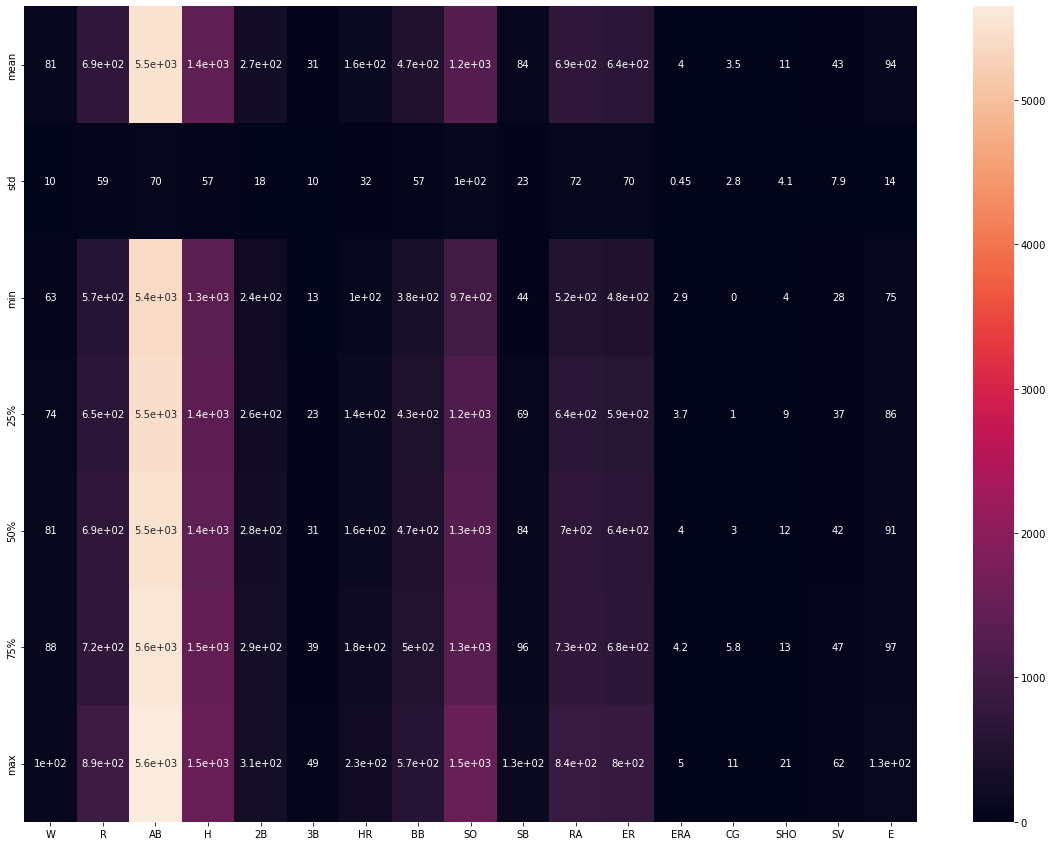

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(df.describe()[1:],annot=True,annot_kws={'size':10})
plt.show()

further we will use the distribution plots to check the spread of the data

Making two separe list for numerical columns (numerical_col) and 
categorical columns (cat_col)

In [13]:
numerical_col=[]
cat_col=[]

In [14]:
for i in df:
    if(df[i].dtype=='float64' or df[i].dtype=='int64'):
        numerical_col.append(i)
    else:
        cat_col.append(i)

CHECKING THE CORRELATION AMONG THE FEATURES AND THE LABELS<BR>
---------------------


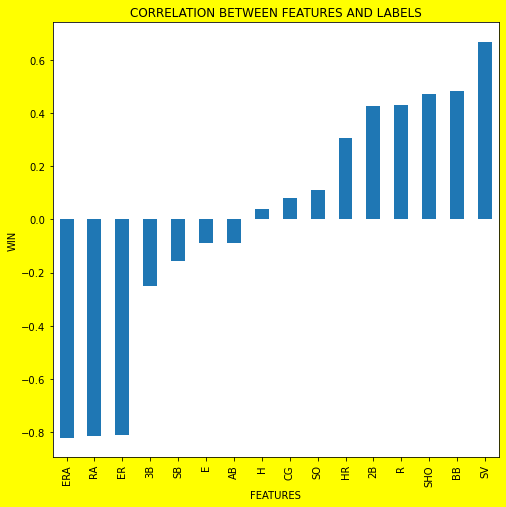

In [16]:
plt.figure(figsize=(8,8),facecolor='Yellow')
df.corr()['W'].drop(['W']).sort_values().plot(kind='bar')
plt.title("CORRELATION BETWEEN FEATURES AND LABELS")
plt.xlabel("FEATURES")
plt.ylabel("WIN")
plt.show()


Observations and explanations below are  based on general understandings of the game and the rules these observations will later checking with the plots and other techniques to support and verify these explanations <br><br><br><br>


Positive correlations:<br><br><br>
************** 


Above is the plot which describes the correlation of the features with the label<br><br>
    AS WE CAN SEE SAVES(SV) HAVE HIGHEST POSITIVE CORRELATION WITH THE TEAM IS ALREADY IN FAVOUR AND A PITCHER MAINTAING THE LEAD AND STOPPING THE OPPONENTS FROM TAKING THE LEAD OBVIOUSLY INCREASES THE WINNING CHANCES FOR THE PITCHING TEAM<BR><BR>
    BASE ON BALLS AND SHUTOUTS ARE ALSO HIGHLY POSITIVELY  CORRELATED TO WIN AS A 4 BALLS OUTSIDE STRIKE ZONE AUTOMATICALLY REWARDS THE BATTER AND HELPS HIM MOVE A BASE <BR><BR>
    SHUTOUTs definately favour the pitching team as a no runs are allowed in the complete inning and a single pitcher blocked the batting team decreasing the chances of win for batting team<br><br>
    More Runs obviously helps team to increases the chance of winning <br><br>
    Similarly 2B, HOMERUNS also helps the batting team to get into favour showing better positive correlations <br><br>
    Its notable to see that StrikeOut, CompleteGame and hits also have some positive correlation with the win as they may helps the batting team to take a lead and register a win<BR><BR><BR><BR>
    
    
    
    
    
    
Negative correlations :<br><br><br>
**********************

    
Earner runs average have the strongest negative correlation with win .This correlation might be for the pitching team as if more runs are scored by the batting team its tough for the pitching team to win giving a strong ngative corrrelation<br><br>
Runs average and the earned runs are having strong negative correation with the win for pitching team and the reason is same as discussed above<br><br>
Scoring a 3 base gives more points to batting team and hence decreasing the winning percentages for the pitching team<br><br>

Stolen bases and the errors surely gives a downward blow for the pitching team and a average neagtive correlation can be seen with the win<br><br>
    

                                                                               


    


plotting a heatmpap for the correlation among the features and the features and the label<br><br>

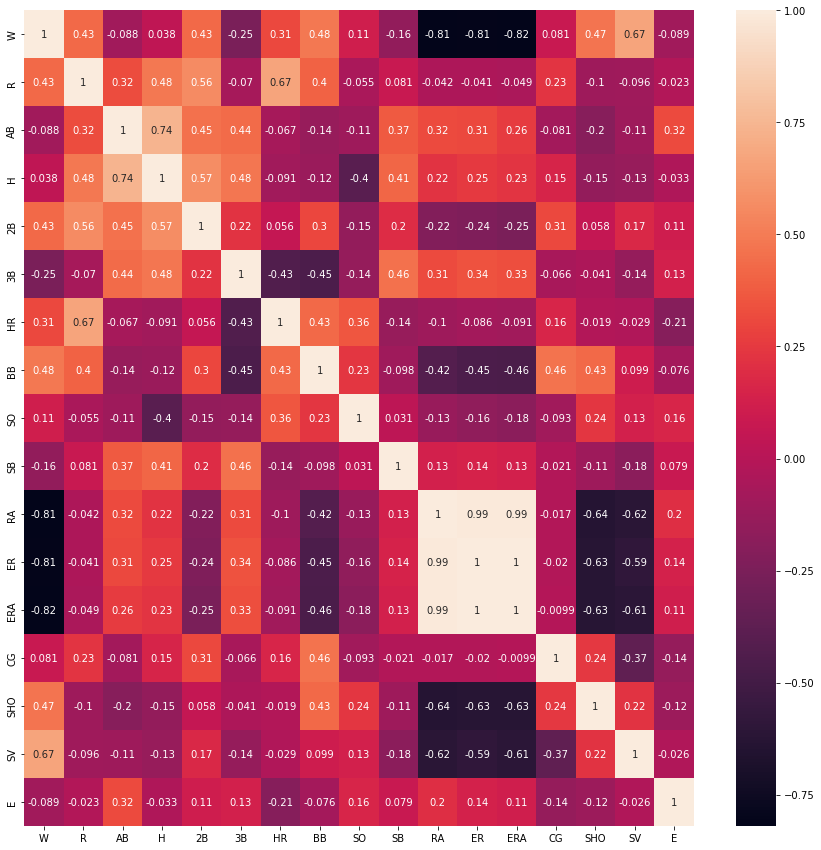

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,annot_kws={"size":10})
plt.show()

OBSEERVATIONS :<BR><BR>
    RUN AVERAGE(RA) AND EARNED RUN AVERAGE(ERA) ARE HAVING A CORREALTION OF 0.99 <BR><BR>
    RUN AVERAGE (RA) AND EARNED RUNS (ER) ARE HAVING A CORRELATION OF 0.99 <BR><BR>
Reason:<br><br><br>
    
Eraned runs average formaula is :<br><br>
((9 x earned runs / innings)) pitched and   an earned run is any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team <br><br>
AS RUNS consitutues of earned runs and unearned runs that formaula completely links both entites and giving 0.99 correaltion between ERA AND RA and RA AND ER
    

This is a case of clear multicolleinearity which we will further check this  using VariancIinflationFactor and take any decision 
-----------------




------------------------------------------------------------------------------------------------------------

Plots describing  the distribution and relationships among the features and of the features with the label<br><br>
-------------------------


In [18]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

RUNS(R)
--------------------------

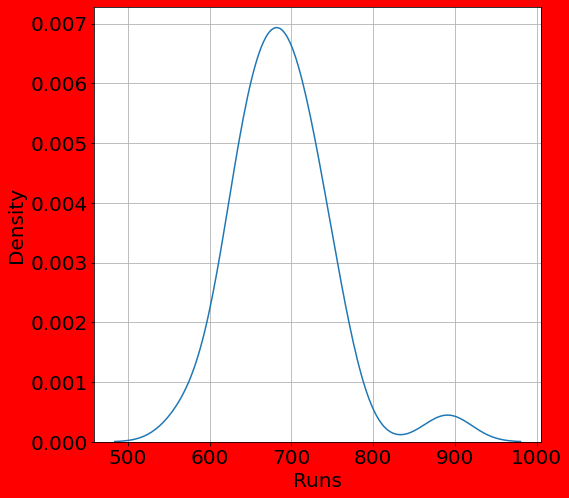

In [19]:
plt.figure(figsize=(8,8),facecolor='Red')
plt.grid(True)
plt.xticks(size=20)
plt.yticks(size=20)
sns.kdeplot(df['R'])
plt.xlabel('Runs',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()

In [20]:
print(f"MEAN VALUE IS {df['R'].describe()['mean']} ")
print(f"MAX VALUE IS {df['R'].describe()['max']}")
print(f"MIN VALUE IS {df['R'].describe()['min']}")
print(f"STANDARD DEVIATION IS AROUND {df['R'].describe()['std']}")

MEAN VALUE IS 688.2333333333333 
MAX VALUE IS 891.0
MIN VALUE IS 573.0
STANDARD DEVIATION IS AROUND 58.76175353204599


observation- outliers maybe present to the right of the mean

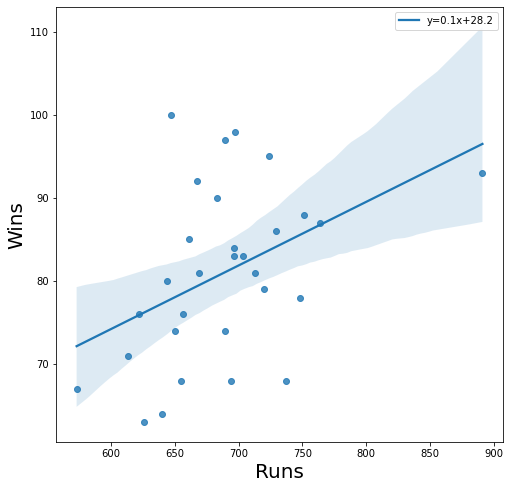

In [21]:
plt.figure(figsize=(8,8))
slope, intercept, r_value, p_value, std_err = stats.linregress(df['R'],df['W'])
ax=sns.regplot(x=df['R'],y=df['W'],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.xlabel('Runs',fontsize=20)
plt.ylabel('Wins',fontsize=20)
plt.legend()
plt.show()

A regplot between "R" AND "W" with describing the slope of the fitting line and the intercept can be clearly seen above<br>
Justifying the high positive correlation between both the features

BOXPLOT TO CHECK THE OUTLIERS
----------

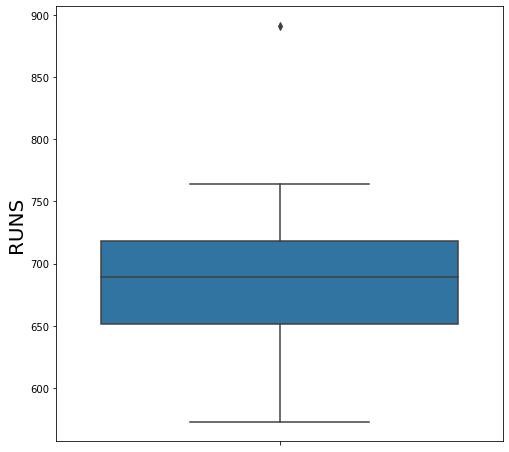

In [22]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['R'])
plt.ylabel('RUNS',fontsize=20)
plt.show()

Presence of outliers in range 850 to 900

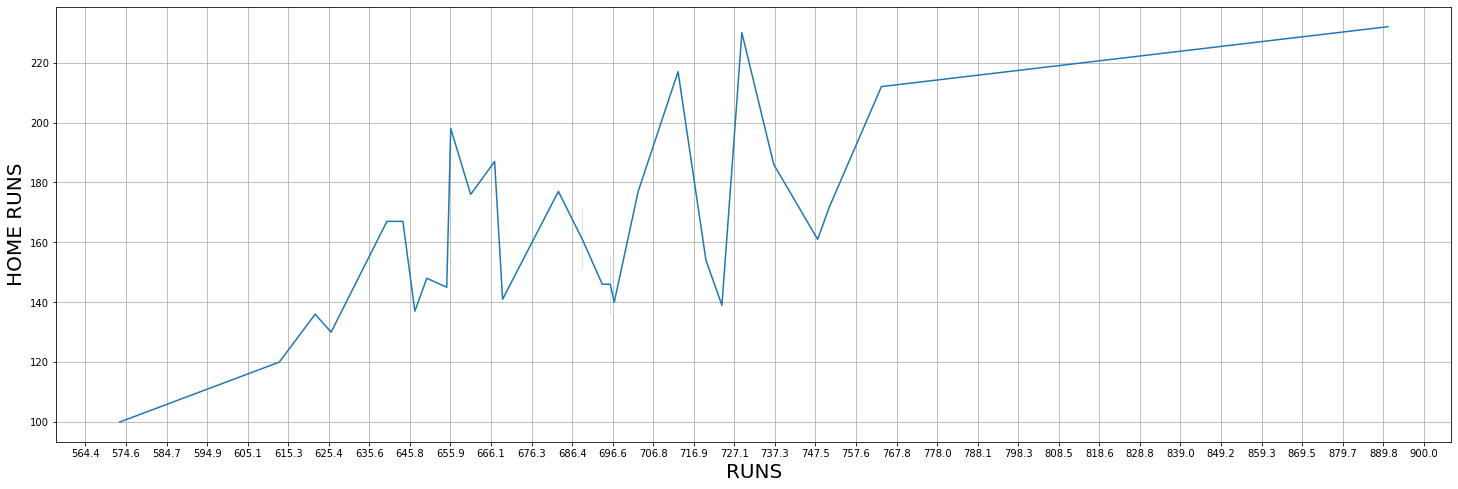

In [23]:
plt.figure(figsize=(25,8))
plt.grid(True)
plt.xticks(np.linspace(300,900,60))
sns.lineplot(x=df['R'],y=df['HR'])
plt.xlabel('RUNS',fontsize=20)
plt.ylabel('HOME RUNS',fontsize=20)
plt.show()

A STRONG CORRELATION CAN BE SEEN BETWEEN THE RUNS("R") AND THE HOME RUN("HR") from the lineplot<br>
MORE RUNS OFTEN SUPPORT THE FACTS THAT THERE ARE CHANCES THAT THEY ARE DUE TO HOMERUNS 

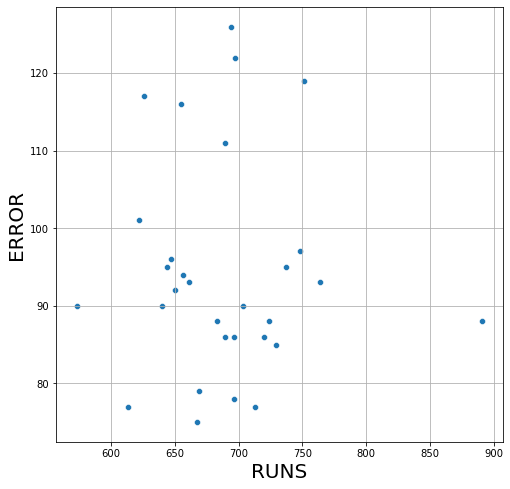

In [24]:
plt.figure(figsize=(8,8))
plt.grid(True)
sns.scatterplot(x=df['R'],y=df['E'])
plt.xlabel('RUNS',fontsize=20)
plt.ylabel('ERROR',fontsize=20)
plt.show()

no clear relationship visible between Runs(R) and ERROR(E)<br>

AT BAT (AB) FEATURE
-----------------------

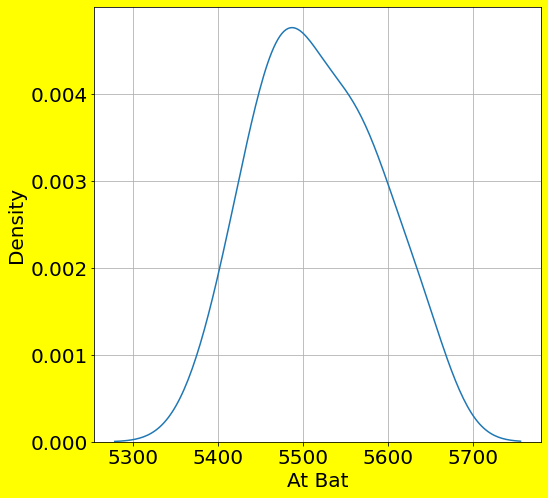

In [25]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
plt.xticks(size=20)
plt.yticks(size=20)
sns.kdeplot(df['AB'])
plt.xlabel('At Bat',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()

In [26]:
df['AB'].describe().T

count      30.000000
mean     5516.266667
std        70.467372
min      5385.000000
25%      5464.000000
50%      5510.000000
75%      5570.000000
max      5649.000000
Name: AB, dtype: float64

Looks like a better gaussian ditribution!!!

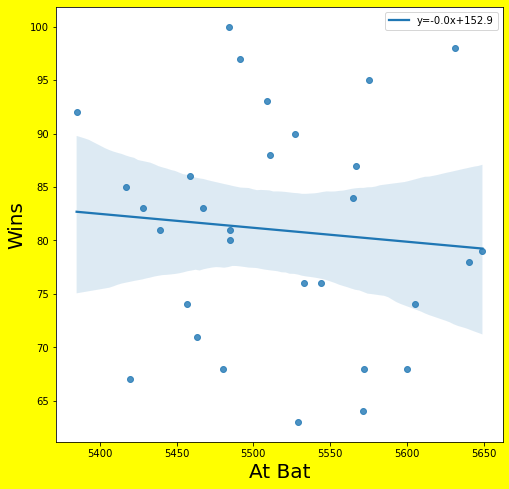

In [27]:
plt.figure(figsize=(8,8),facecolor="Yellow")
slope, intercept, r_value, p_value, std_err = stats.linregress(df['AB'],df['W'])
ax=sns.regplot(x=df['AB'],y=df['W'],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.xlabel('At Bat',fontsize=20)
plt.ylabel('Wins',fontsize=20)
plt.legend()
plt.show()

with negative slope it can be inferred that and that too almost nil its clear that no strong correlation exist between two

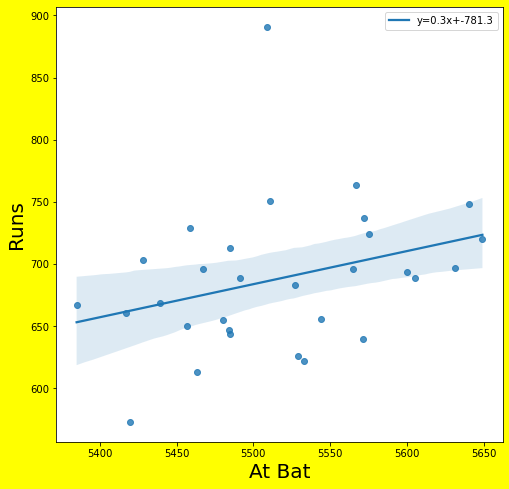

In [28]:
plt.figure(figsize=(8,8),facecolor="Yellow")
slope, intercept, r_value, p_value, std_err = stats.linregress(df['AB'],df['R'])
ax=sns.regplot(x=df['AB'],y=df['R'],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.xlabel('At Bat',fontsize=20)
plt.ylabel('Runs',fontsize=20)
plt.legend()
plt.show()

A significant relationship can be seen between AT BAT AND RUNS (R) scored describing that more no of at bat gives chances of more runs<br>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 576x576 with 0 Axes>

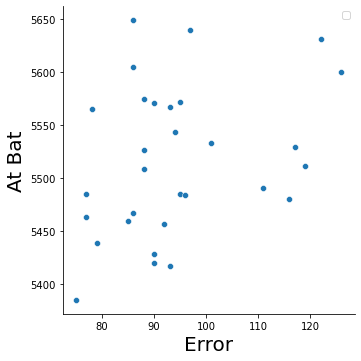

In [29]:
plt.figure(figsize=(8,8),facecolor="Yellow")
ax=sns.relplot(x=df['E'],y=df['AB'])
plt.ylabel('At Bat',fontsize=20)
plt.xlabel('Error',fontsize=20)
plt.legend()
plt.show()

relationshp between at bat (AB) and Error(E)<br>
with increased number of errors clear chances for at bat giving  batting team a edge

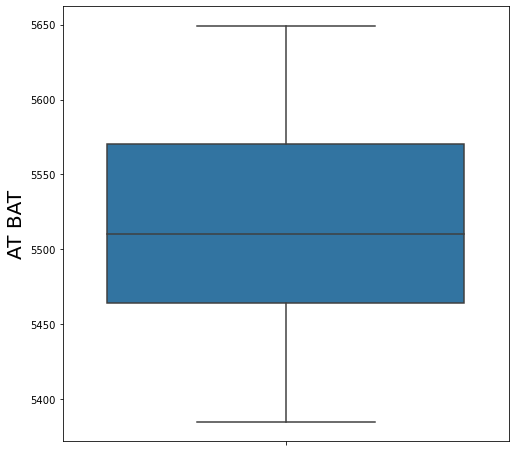

In [30]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['AB'])
plt.ylabel('AT BAT',fontsize=20)
plt.show()

NO OUTLIER IN AT BAT (AB) COLUMN AND A GOOD DISTRIBUTION CAN BE OBSERVED

HITS AS A FEATURE(H)
---------------------------

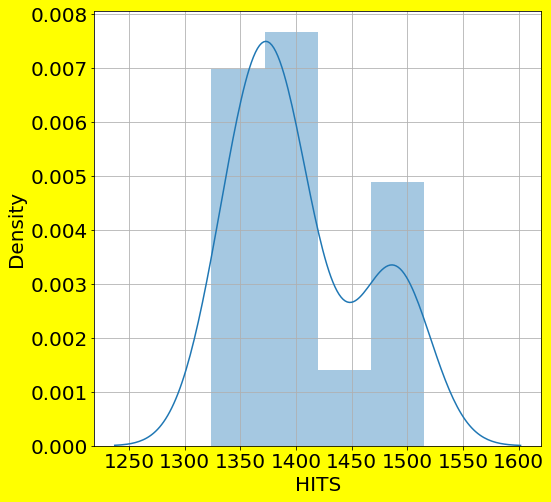

In [31]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
plt.xticks(size=20)
plt.yticks(size=20)
ax=sns.distplot(df['H'])
plt.xlabel('HITS',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()

A SKEWNESS TO THE RIGHT CAN BE OBSERVED FROM THE CURVES<BR>

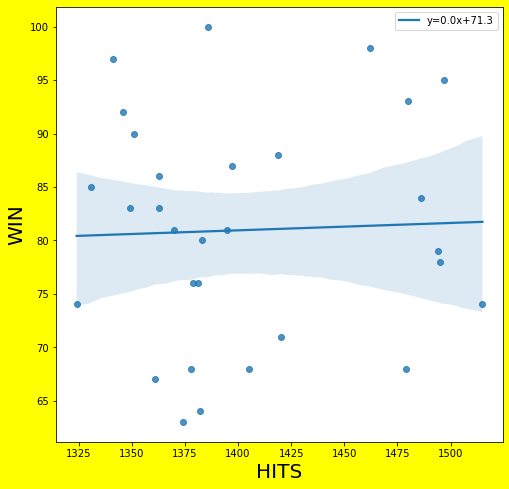

In [32]:
plt.figure(figsize=(8,8),facecolor="Yellow")
slope, intercept, r_value, p_value, std_err = stats.linregress(df['H'],df['W'])
ax=sns.regplot(x=df['H'],y=df['W'],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.xlabel('HITS',fontsize=20)
plt.ylabel('WIN',fontsize=20)
plt.legend()
plt.show()

TOO MUCH SCATTERED POINTS DESCRIBING THE RANDOM SPREAD OF THE DATA<BR>
A LESS BUT NOTICEABLE RELATIONSHIP CAN BE SEEN BETWEEN THE FEATURES<BR>
MORE HITS WILL ALWAYS PREFER THE BATTING TEAM 

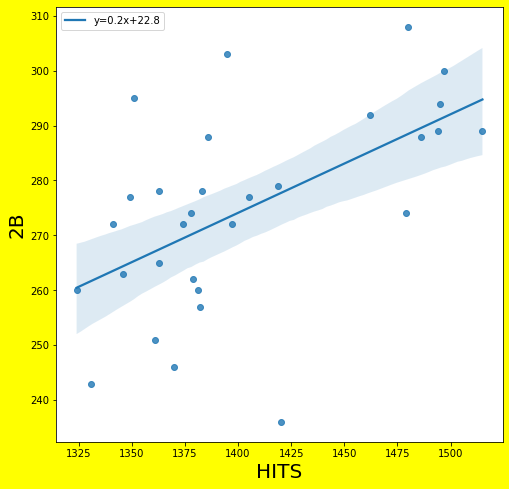

In [33]:
plt.figure(figsize=(8,8),facecolor="Yellow")
slope, intercept, r_value, p_value, std_err = stats.linregress(df['H'],df['2B'])
ax=sns.regplot(x=df['H'],y=df['2B'],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.xlabel('HITS',fontsize=20)
plt.ylabel('2B',fontsize=20)
plt.legend()
plt.show()

 A STRONG POSITIVE CORRELATION CAN BE OBSERVED BETWEEN THE TWO<BR>
MOST OF THE HITS RESULT IN A 2B  which is the good thing for the batting team<br>
AS THE HITS INCREASES THE PROBABILITY OF A 2B ALSO INCREASES


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


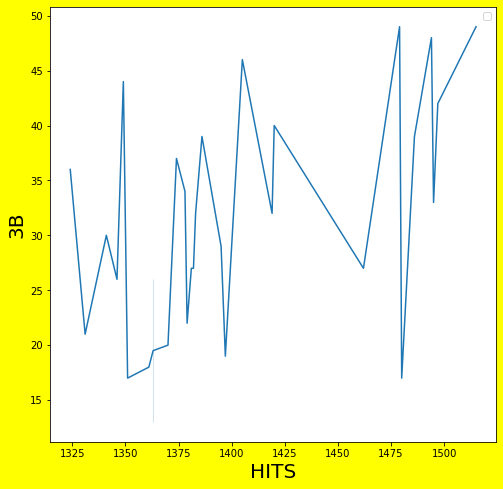

In [34]:
plt.figure(figsize=(8,8),facecolor="Yellow")
ax=sns.lineplot(x=df['H'],y=df['3B'])
plt.ylabel('3B',fontsize=20)
plt.xlabel('HITS',fontsize=20)
plt.legend()
plt.show()

A  NOT VERY PROMINENT BUT A UNAVOIDABLE RELATIONSHIP EXISTS BETWEEN THE TWO<BR>
ALSO HINTING THAT A HIT WILL RARELY RESULT IN BATTER GETTING 3B<BR>
    I.E CHANCES ARE LESS OF A 3B


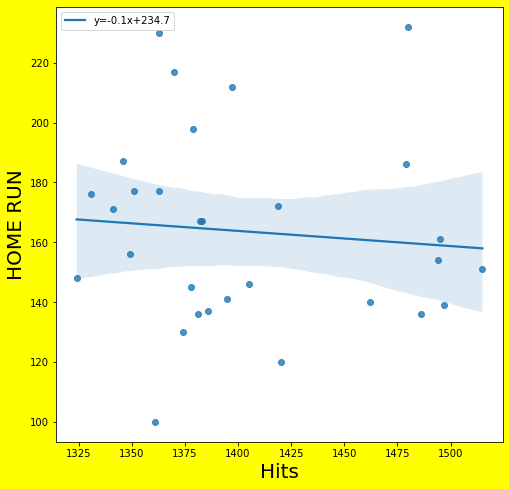

In [35]:
plt.figure(figsize=(8,8),facecolor="Yellow")
slope, intercept, r_value, p_value, std_err = stats.linregress(df['H'],df['HR'])
ax=sns.regplot(x=df['H'],y=df['HR'],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.xlabel('Hits',fontsize=20)
plt.ylabel('HOME RUN',fontsize=20)
plt.legend()
plt.show()

A VERY FADED RELATIONSHIP BETWEEN THE HITS AND HOMERUNS<BR>
ALSO INFERRING THAT VERY LESS NUMBER OF HITS RESULT IN HOME RUNS<BR>

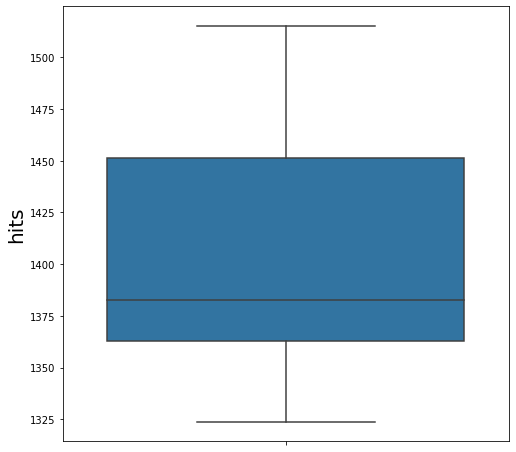

In [36]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['H'])
plt.ylabel('hits',fontsize=20)
plt.show()

no outliers present in hits taken

SCORING A 2B
-----------------

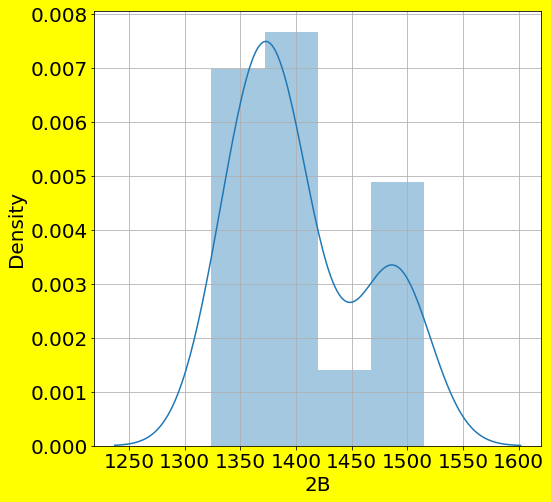

In [37]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
plt.xticks(size=20)
plt.yticks(size=20)
ax=sns.distplot(df['H'])
plt.xlabel('2B',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()

little skewness to the right can be observed clearly<br>

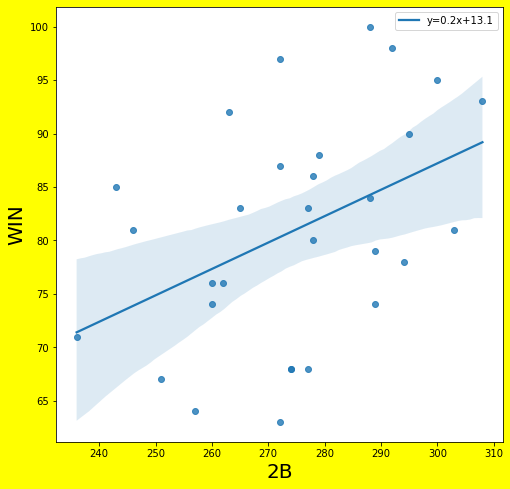

In [38]:
plt.figure(figsize=(8,8),facecolor="Yellow")
slope, intercept, r_value, p_value, std_err = stats.linregress(df['2B'],df['W'])
ax=sns.regplot(x=df['2B'],y=df['W'],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.xlabel('2B',fontsize=20)
plt.ylabel('WIN',fontsize=20)
plt.legend()
plt.show()

A STRONG CORRELATION BE SEEN BETWEEN THE TAKING A 2B AND THE WIN<BR>
MORE 2B MEANS MORE RUNS APPROACHING THE WIN HENCE IMPROVING THE ODDS OF WINNING<BR>

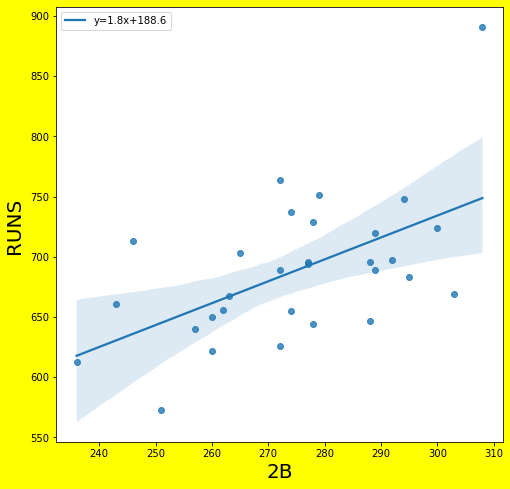

In [39]:
plt.figure(figsize=(8,8),facecolor="Yellow")
slope, intercept, r_value, p_value, std_err = stats.linregress(df['2B'],df['R'])
ax=sns.regplot(x=df['2B'],y=df['R'],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.xlabel('2B',fontsize=20)
plt.ylabel('RUNS ',fontsize=20)
plt.legend()
plt.show()

AS EXPLAINED ABOVE ITS A CLEAR RELATIONSHIP BETWEEN REWARDED AS 2BA ND RUNS

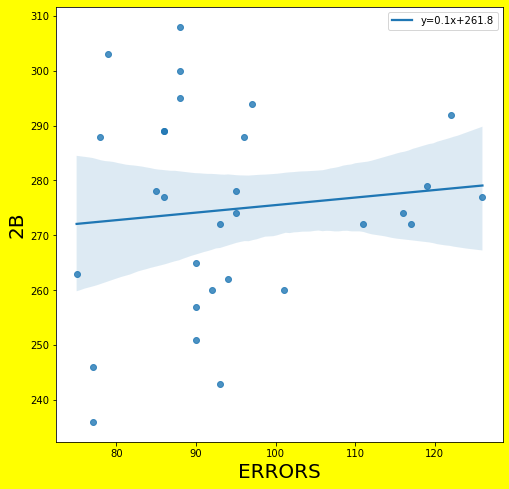

In [40]:
plt.figure(figsize=(8,8),facecolor="Yellow")
slope, intercept, r_value, p_value, std_err = stats.linregress(df['E'],df['2B'])
ax=sns.regplot(y=df['2B'],x=df['E'],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.xlabel('ERRORS',fontsize=20)
plt.ylabel('2B',fontsize=20)
plt.legend()
plt.show()

INCREASED NUMBER OF ERRROS OFTEN INCREASES THE CHANCE OF  BATTER REWARDED AS  2B<BR>
THESE ERRORS ARE AFFECTING THE PITCHING TEAM AS CHANCES OF BATTER ATTAINING A 2B INCREASES WITH A SIGNIFIANT AMOUNT


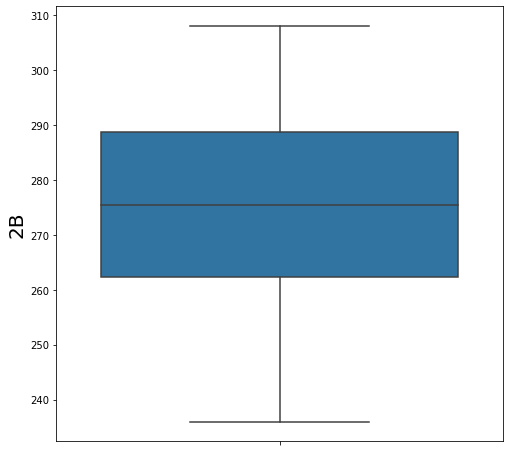

In [41]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['2B'])
plt.ylabel('2B',fontsize=20)
plt.show()

NO OUTLIERS DETECTING IN THE RANGE<BR>

 3B IMPACT
-----------------

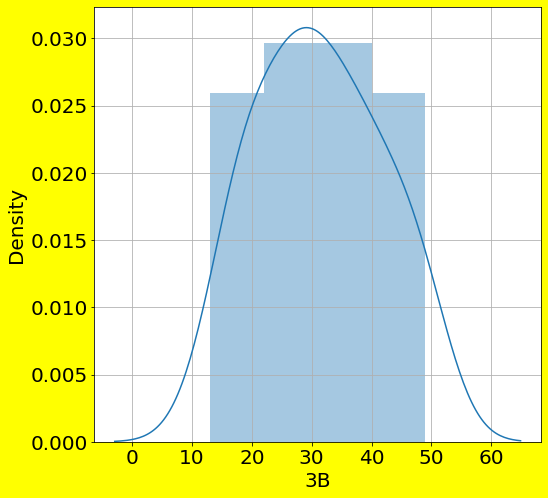

In [42]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
plt.xticks(size=20)
plt.yticks(size=20)
ax=sns.distplot(df['3B'])
plt.xlabel('3B',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()

A PERFECT GAUSSIAN CURVE CAN BE OBSERVED WITH LITTLE OR NO SKEWNESS AND OUTLIERS 

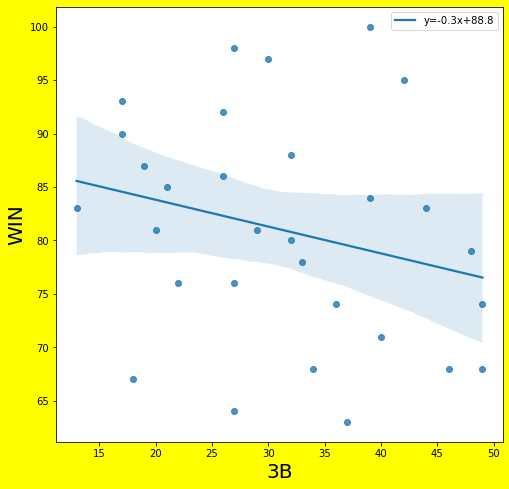

In [43]:
plt.figure(figsize=(8,8),facecolor="Yellow")
slope, intercept, r_value, p_value, std_err = stats.linregress(df['3B'],df['W'])
ax=sns.regplot(x=df['3B'],y=df['W'],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.xlabel('3B',fontsize=20)
plt.ylabel('WIN',fontsize=20)
plt.legend()
plt.show()

ITS QUIET OBVIOUS THAT INCREASED 3Bs will result in more runs hence giving more runs to the team decreasing the win probability of the pitching team

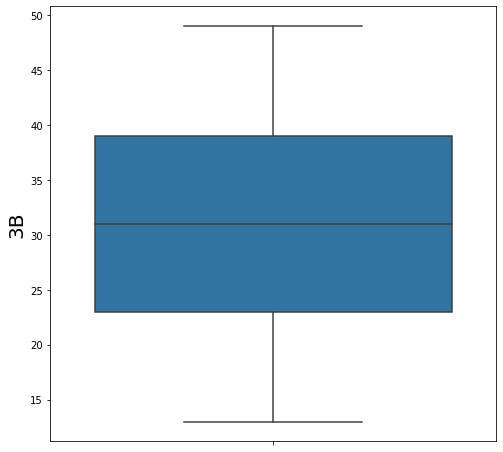

In [44]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['3B'])
plt.ylabel('3B',fontsize=20)
plt.show()

NO OUTLIERS DETECTED IN THE REGION

IMPACT OF HOME RUNS(HR)
-------------------------

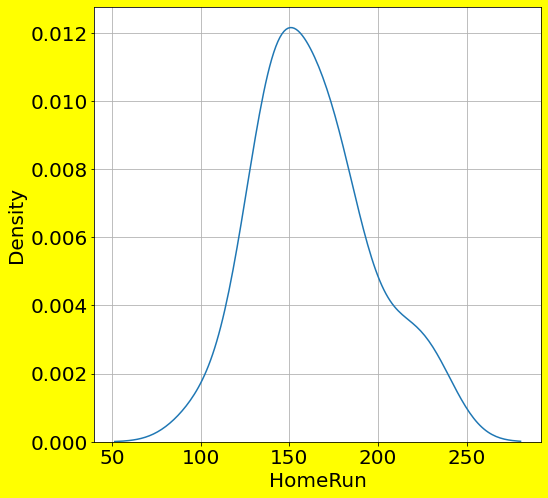

In [45]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
plt.xticks(size=20)
plt.yticks(size=20)
ax=sns.kdeplot(df['HR'])
plt.xlabel('HomeRun',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()

distribution looks pretty descent !!

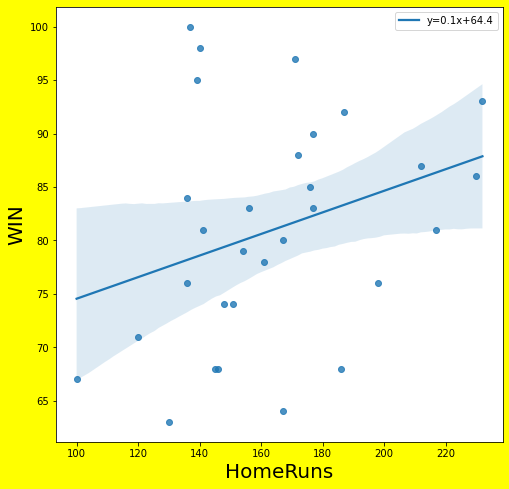

In [46]:
plt.figure(figsize=(8,8),facecolor="Yellow")
slope, intercept, r_value, p_value, std_err = stats.linregress(df['HR'],df['W'])
ax=sns.regplot(x=df['HR'],y=df['W'],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.xlabel('HomeRuns',fontsize=20)
plt.ylabel('WIN',fontsize=20)
plt.legend()
plt.show()

scoring home runs enhaces the chances of win as it directly gives Anywhere from 1 to 4 depending on how many runners are on base. If there's nobody on it's 1 run. If the bases were loaded, it's a grand slam and 4 runs score<br>
Hence improving the chances of winning to great extent

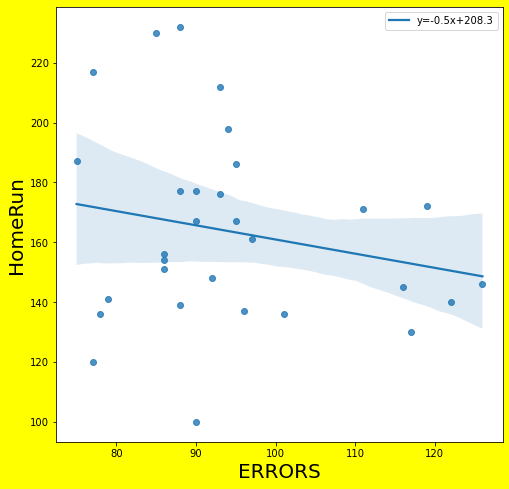

In [47]:
plt.figure(figsize=(8,8),facecolor="Yellow")
slope, intercept, r_value, p_value, std_err = stats.linregress(df['E'],df['HR'])
ax=sns.regplot(x=df['E'],y=df['HR'],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.xlabel('ERRORS',fontsize=20)
plt.ylabel('HomeRun',fontsize=20)
plt.legend()
plt.show()

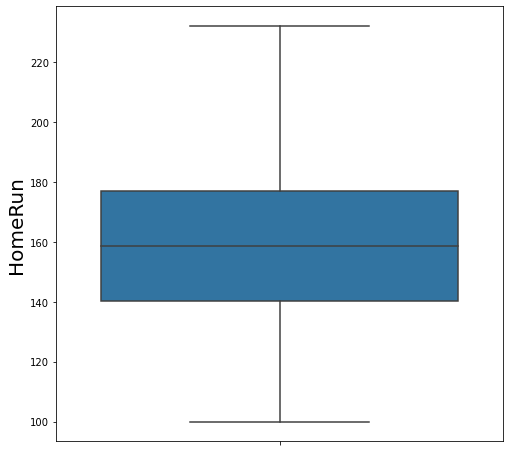

In [48]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['HR'])
plt.ylabel('HomeRun',fontsize=20)
plt.show()

NO OUTLIER IN HOME RUN COLUMN

BASE ON BALL(BB) 
--------------------

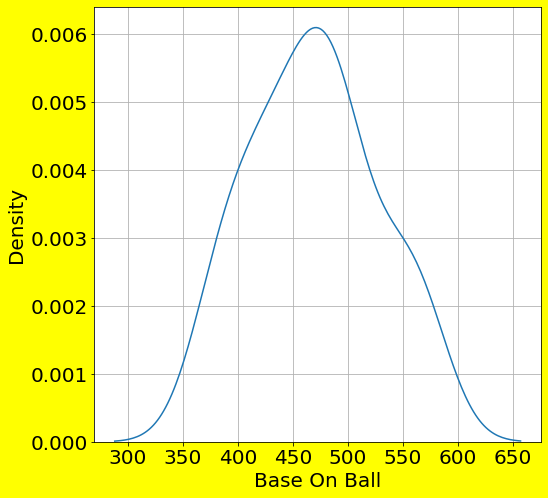

In [49]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
plt.xticks(size=20)
plt.yticks(size=20)
ax=sns.kdeplot(df['BB'])
plt.xlabel('Base On Ball',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()

quiet descent distribution of the Base on ball happening in a game<br>

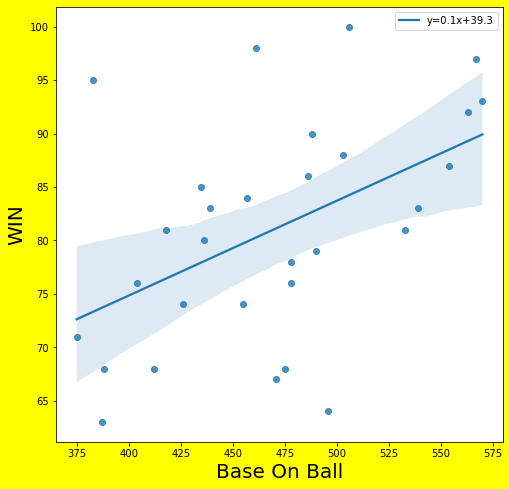

In [50]:
plt.figure(figsize=(8,8),facecolor="Yellow")
slope, intercept, r_value, p_value, std_err = stats.linregress(df['BB'],df['W'])
ax=sns.regplot(x=df['BB'],y=df['W'],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.xlabel('Base On Ball',fontsize=20)
plt.ylabel('WIN',fontsize=20)
plt.legend()
plt.show()

It can be considered as a reward to the batter as hes not swinging on the pitch which is out from the strike zone<br>
requires high level of skills as judgement is very important in leaving the pitch <br>
gradually the increasing the win odds as it rewards the batter a base advancement

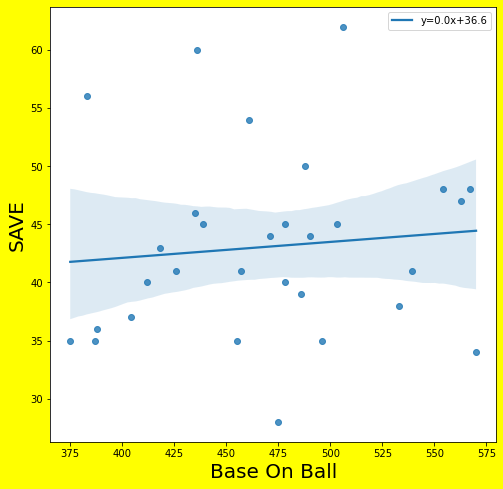

In [51]:
plt.figure(figsize=(8,8),facecolor="Yellow")
slope, intercept, r_value, p_value, std_err = stats.linregress(df['BB'],df['SV'])
ax=sns.regplot(x=df['BB'],y=df['SV'],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.xlabel('Base On Ball',fontsize=20)
plt.ylabel('SAVE',fontsize=20)
plt.legend()
plt.show()

IT MAY LEAD A PROBLEM TO SAVE AS THE SAVE pitcher MIGHT NOT BE ABLE TO maintain the lead in some instances hence resulting in giving the lead to the offensice team

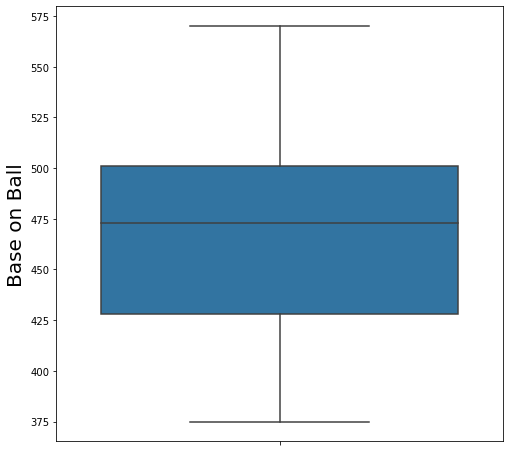

In [52]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['BB'])
plt.ylabel('Base on Ball',fontsize=20)
plt.show()

NO OUTLIERS FOUND IN BB 

IMPACT OF STRIKE OUT(SO)
------------------------

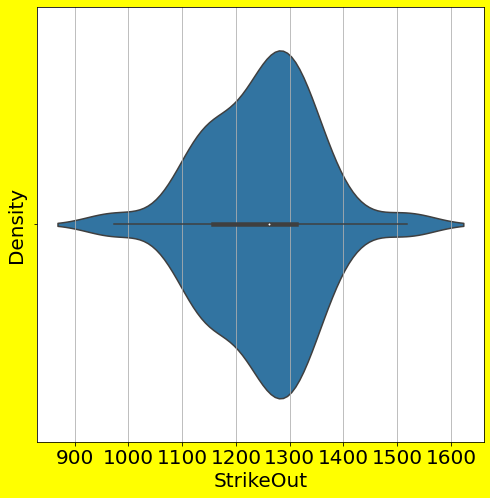

In [53]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
plt.xticks(size=20)
plt.yticks(size=20)
ax=sns.violinplot(df['SO'])
plt.xlabel('StrikeOut',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()

a liitle left skewness can be observed in the plot!!!!

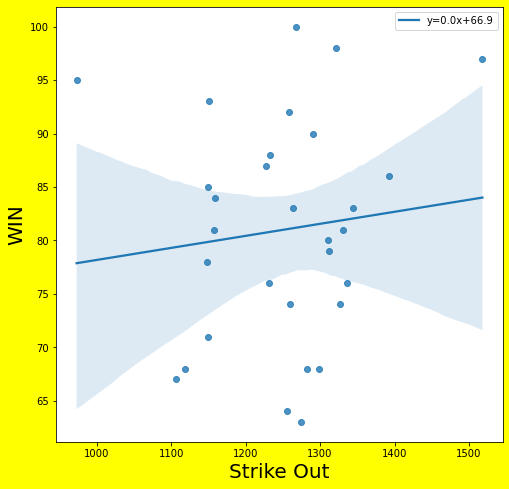

In [54]:
plt.figure(figsize=(8,8),facecolor="Yellow")
slope, intercept, r_value, p_value, std_err = stats.linregress(df['SO'],df['W'])
ax=sns.regplot(x=df['SO'],y=df['W'],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.xlabel('Strike Out',fontsize=20)
plt.ylabel('WIN',fontsize=20)
plt.legend()
plt.show()

though not a prominent relation can be seen between strike out and win but it does a positive correlation with the win signifying that taking a batter through strike out establishes some chances of winning

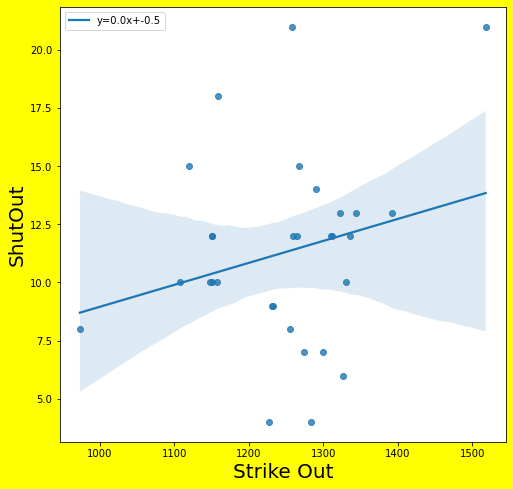

In [55]:
plt.figure(figsize=(8,8),facecolor="Yellow")
slope, intercept, r_value, p_value, std_err = stats.linregress(df['SO'],df['SHO'])
ax=sns.regplot(x=df['SO'],y=df['SHO'],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.xlabel('Strike Out',fontsize=20)
plt.ylabel('ShutOut',fontsize=20)
plt.legend()
plt.show()

from the heatmap can be seen that there is a 24% correlation existing between the two<br>
multiple strike outs can lead to offensive team scoring nothing and hence resulting in a shutout

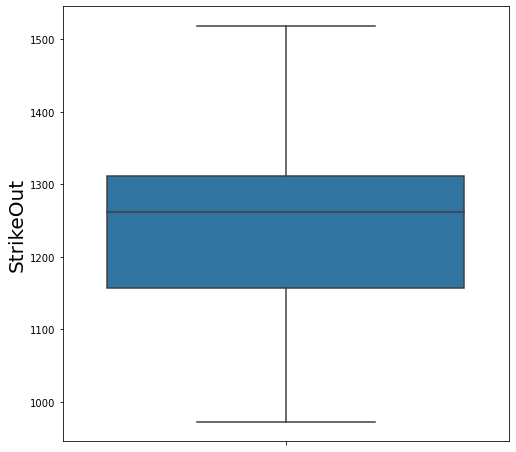

In [56]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['SO'])
plt.ylabel('StrikeOut',fontsize=20)
plt.show()

strike out have no outliers

Stolen Bases(SB) impact
--------------------------

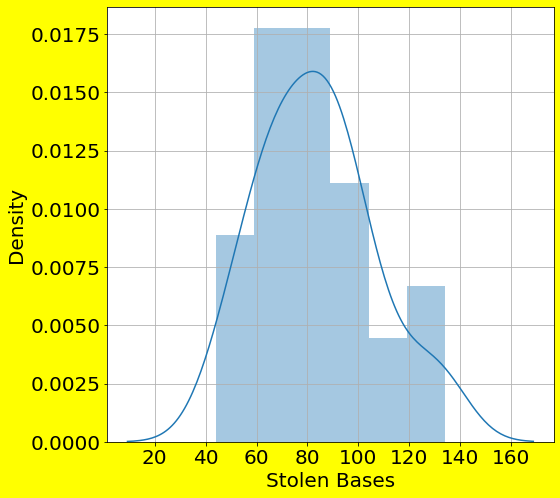

In [57]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
plt.xticks(size=20)
plt.yticks(size=20)
ax=sns.distplot(df['SB'])
plt.xlabel('Stolen Bases',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()

distribution seems nice and without much skewness and outliers

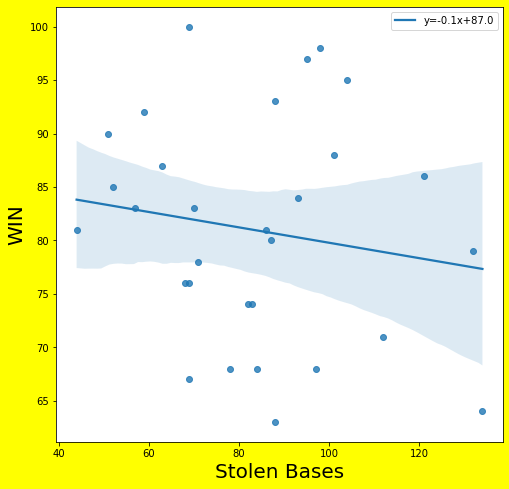

In [58]:
plt.figure(figsize=(8,8),facecolor="Yellow")
slope, intercept, r_value, p_value, std_err = stats.linregress(df['SB'],df['W'])
ax=sns.regplot(x=df['SB'],y=df['W'],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.xlabel('Stolen Bases',fontsize=20)
plt.ylabel('WIN',fontsize=20)
plt.legend()
plt.show()

Around 16% correlation between the stoles bases and the win<br>
requires quick response and speed by the runner to steal a base<br>
May help in some situations to get the winning percentages together<br>


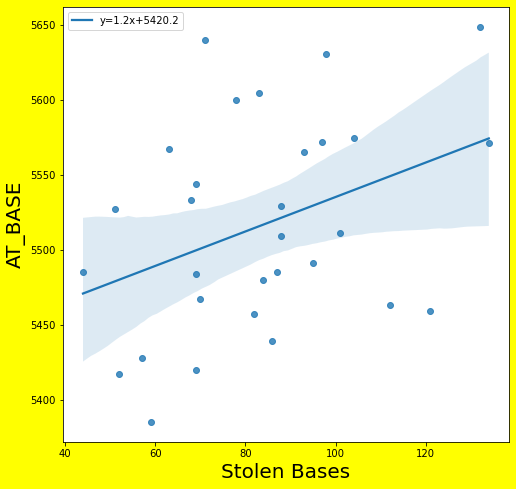

In [59]:
plt.figure(figsize=(8,8),facecolor="Yellow")
slope, intercept, r_value, p_value, std_err = stats.linregress(df['SB'],df['AB'])
ax=sns.regplot(x=df['SB'],y=df['AB'],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.xlabel('Stolen Bases',fontsize=20)
plt.ylabel('AT_BASE',fontsize=20)
plt.legend()
plt.show()

more AT_BASES frequency with stolen bases as runner is running over the entitled bases<br>
SECURING A RUN BECOMES EASY AS THE SAME RUNNER COVERS MORE BASES <BR><BR>


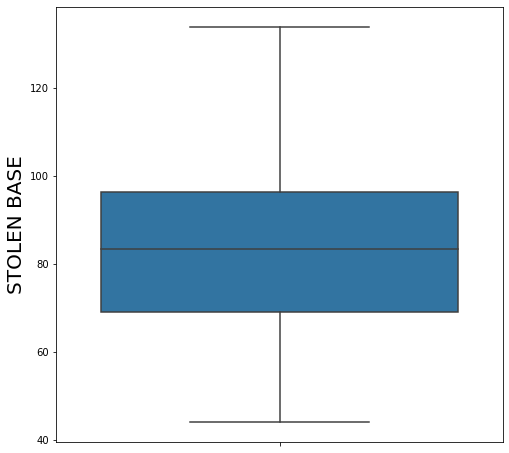

In [60]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['SB'])
plt.ylabel('STOLEN BASE',fontsize=20)
plt.show()

free from any kinda outliers

RUNS AVERGAE(RA)
------------------------

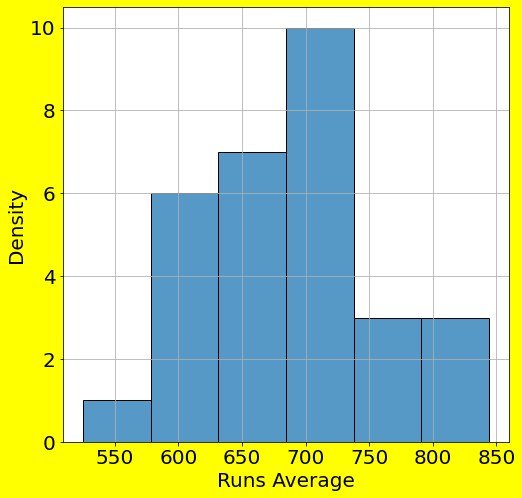

In [61]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
plt.xticks(size=20)
plt.yticks(size=20)
ax=sns.histplot(df['RA'])
plt.xlabel('Runs Average',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()

DENSITY IS MAXIUM FOR 700-750 RUNS average over the entire region<br>

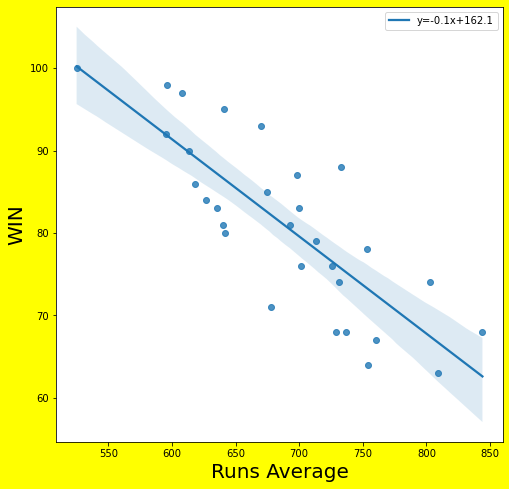

In [62]:
plt.figure(figsize=(8,8),facecolor="Yellow")
slope, intercept, r_value, p_value, std_err = stats.linregress(df['RA'],df['W'])
ax=sns.regplot(x=df['RA'],y=df['W'],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.xlabel('Runs Average',fontsize=20)
plt.ylabel('WIN',fontsize=20)
plt.legend()
plt.show()

 A STRONG SLOPE AND AS MOST POINTS ARE FITTING ON THE LINE IT CAN CLEARLY BE INFERRED THAT AS RUNS AVERAGE INCREASES IT BECOMES DIFFCULT FOR THE OPPONENT TO COMPETE AND WINNING PROBABILITIES INCREAES FOR THE FAVOURABLE TEAM

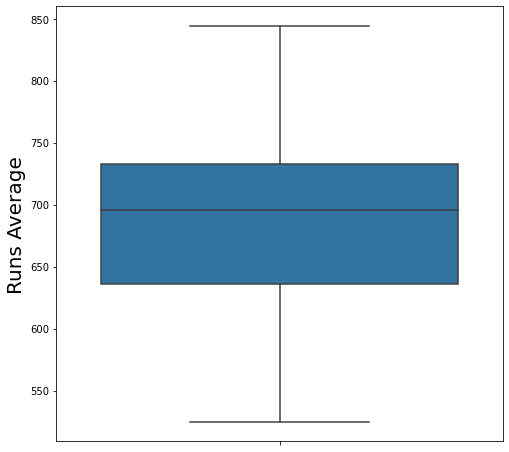

In [63]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['RA'])
plt.ylabel('Runs Average',fontsize=20)
plt.show()

No outliers in Runs Average!!

 Impact OF Earned Run 
------------------

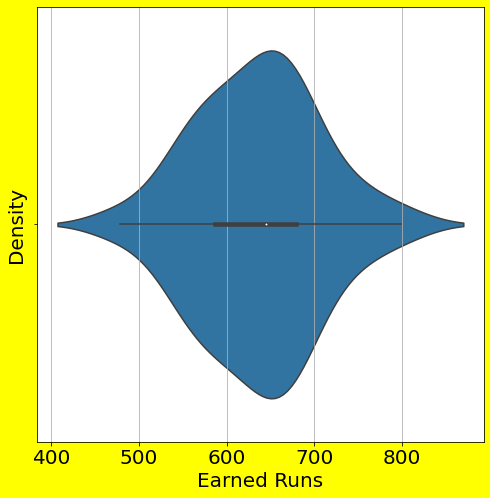

In [64]:
plt.figure(figsize=(8,8),facecolor='Yellow')
plt.grid(True)
plt.xticks(size=20)
plt.yticks(size=20)
ax=sns.violinplot(df['ER'])
plt.xlabel('Earned Runs',fontsize=20)
plt.ylabel('Density',fontsize=20)
plt.show()

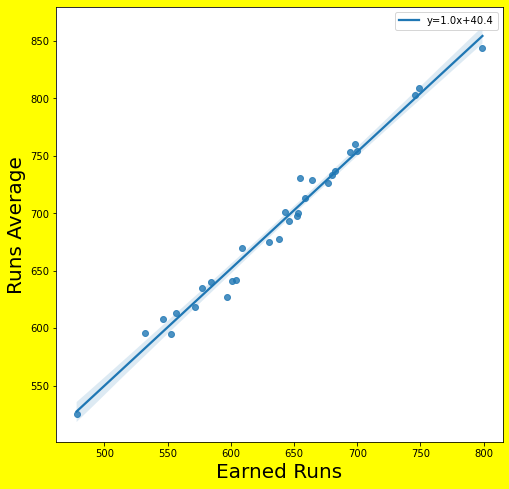

In [65]:
plt.figure(figsize=(8,8),facecolor="Yellow")
slope, intercept, r_value, p_value, std_err = stats.linregress(df['ER'],df['RA'])
ax=sns.regplot(x=df['ER'],y=df['RA'],line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
plt.xlabel('Earned Runs',fontsize=20)
plt.ylabel('Runs Average',fontsize=20)
plt.legend()
plt.show()

As the earned runs is derived from the runs only there is 99 % correlation between the two<br>
WE HAVE TO DECIDE ON DROPPING THE COLUMNS AS THEY ARE GOING TO HAVE STRONG VARIANCE INFLATION SORES<BR>

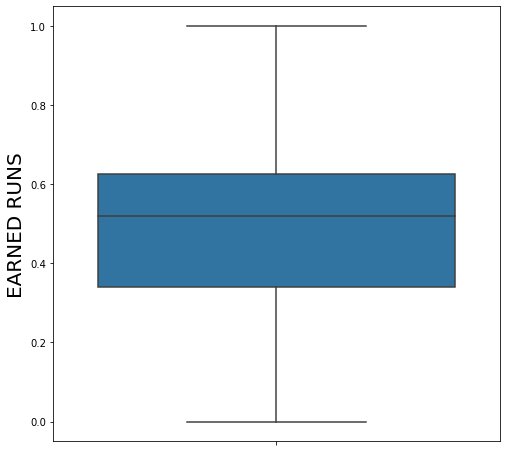

In [71]:
plt.figure(figsize=(8,8))
sns.boxplot(y=df['ER'])
plt.ylabel('EARNED RUNS',fontsize=20)
plt.show()

No Outliers detected in this range

Cheking for the skewness of the data

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64


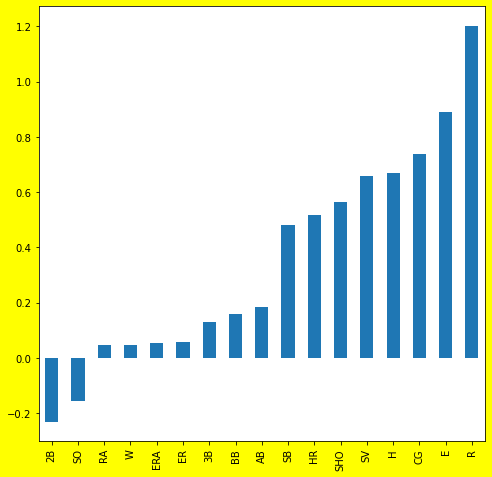

In [72]:
print(df.skew())
plt.figure(figsize=(8,8),facecolor='Yellow')
df.skew().sort_values().plot(kind='bar')
plt.show()

Runs(R) can be seen with proper skewness<br>
Hits(H) have skewnwss too<br>
Errors(E) and Complete GAMES(CG) have a significant skewness too<br>
HomeRuns(HR) and Stolen Bases(SB) have a some kind of skewness too<br>

NORMALISATION USING MIN-MAX SCALER
----------------------

In [73]:
from sklearn.preprocessing import MinMaxScaler

In [74]:
mm=MinMaxScaler()

In [75]:
df=pd.DataFrame(mm.fit_transform(df),columns=df.columns)

In [76]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.864865,0.474843,0.719697,0.905759,0.888889,0.805556,0.295455,0.041026,0.000000,0.666667,0.363636,0.383178,0.376190,0.181818,0.235294,0.823529,0.254902
1,0.540541,0.386792,0.310606,0.130890,0.569444,0.861111,0.424242,0.328205,0.533945,0.288889,0.548589,0.545171,0.538095,0.181818,0.470588,0.500000,0.215686
2,0.486486,0.301887,0.204545,0.371728,0.930556,0.444444,0.310606,0.810256,0.337615,0.466667,0.360502,0.330218,0.347619,1.000000,0.352941,0.294118,0.078431
3,0.351351,0.154088,0.560606,0.298429,0.333333,0.388889,0.272727,0.148718,0.473394,0.266667,0.551724,0.514019,0.495238,0.636364,0.294118,0.264706,0.509804
4,0.297297,0.364780,0.833333,1.000000,0.736111,1.000000,0.386364,0.410256,0.524771,0.433333,0.871473,0.834891,0.809524,0.636364,0.470588,0.205882,0.215686


USING STANDARD SCALER FOR THE STANDARDISATION
-------------------------

In [77]:
from sklearn.preprocessing import PowerTransformer

In [78]:
pt=PowerTransformer()

In [79]:
df=pd.DataFrame(pt.fit_transform(df),columns=df.columns)

In [80]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.342194,0.722783,0.863431,1.470313,1.470835,1.037291,-0.766194,-1.621322,-2.558106,0.944028,-0.659657,-0.497134,-0.500761,-0.427097,-0.799766,1.546770,-0.330407
1,0.223396,0.258432,-0.683236,-1.069715,0.090108,1.211426,-0.158537,-0.496986,0.133735,-0.545864,0.176023,0.258018,0.261609,-0.427097,0.256745,0.361265,-0.527255
2,0.030571,-0.243831,-1.132558,0.063355,1.659756,-0.173468,-0.691085,1.125426,-0.902672,0.210747,-0.673955,-0.746594,-0.636266,2.022815,-0.247869,-0.608550,-1.342965
3,-0.460635,-1.279121,0.292615,-0.232092,-0.848516,-0.373846,-0.880824,-1.182049,-0.191254,-0.648905,0.190060,0.113678,0.060680,1.262283,-0.517368,-0.765604,0.675752
4,-0.661055,0.133746,1.251188,1.633080,0.795264,1.634750,-0.330308,-0.200587,0.084196,0.077272,1.602128,1.582354,1.520948,1.262283,0.256745,-1.096330,-0.527255


OUTLIERS REMOVAL USING DATASIST
------------------------

In [81]:
print(f'SHAPE OF THE DATASET before outlier removal is {df.shape}')

SHAPE OF THE DATASET before outlier removal is (30, 17)


In [82]:
df_nums=df.copy()

In [83]:
from datasist.structdata import detect_outliers

In [84]:
outliers = detect_outliers(df_nums[numerical_col],0,df_nums[numerical_col].columns)

In [85]:
df_nums.drop(outliers,inplace=True)

In [86]:
print(f'SHAPE OF THE DATASET after outlier removal is {df_nums.shape}')

SHAPE OF THE DATASET after outlier removal is (23, 17)


In [87]:
print(f'loss % in the dataset after oulierremoval is  {round((30-23)/30*100,2)}%')

loss % in the dataset after oulierremoval is  23.33%


SINCE LOSS IS 23.33% WHICH IS 1/4rd OF DATA AND ALREADY WE HAVE LESS NUMBER OF ROWS WE WILL KEEP THE OUTLIERS TO BE ON THE SAFER SIDE

In [88]:
x_scaled=df.drop(['W'],axis=1)
y=df['W']

CHECKING FOR MULTICOLLINEARITY PROBLEM
---------------------

In [80]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
vif=pd.DataFrame()

In [82]:
scores=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [83]:
features=x_scaled.columns

In [84]:
vif['FEATURES']=features
vif['SCORES']=scores

In [85]:
vif

,FEATURES,SCORES
0,R,9.517586
1,AB,12.817269
2,H,6.977968
3,2B,3.770064
4,3B,3.372942
5,HR,11.005218
6,BB,3.380790
7,SO,2.835665
8,SB,2.182842
9,RA,237.665881


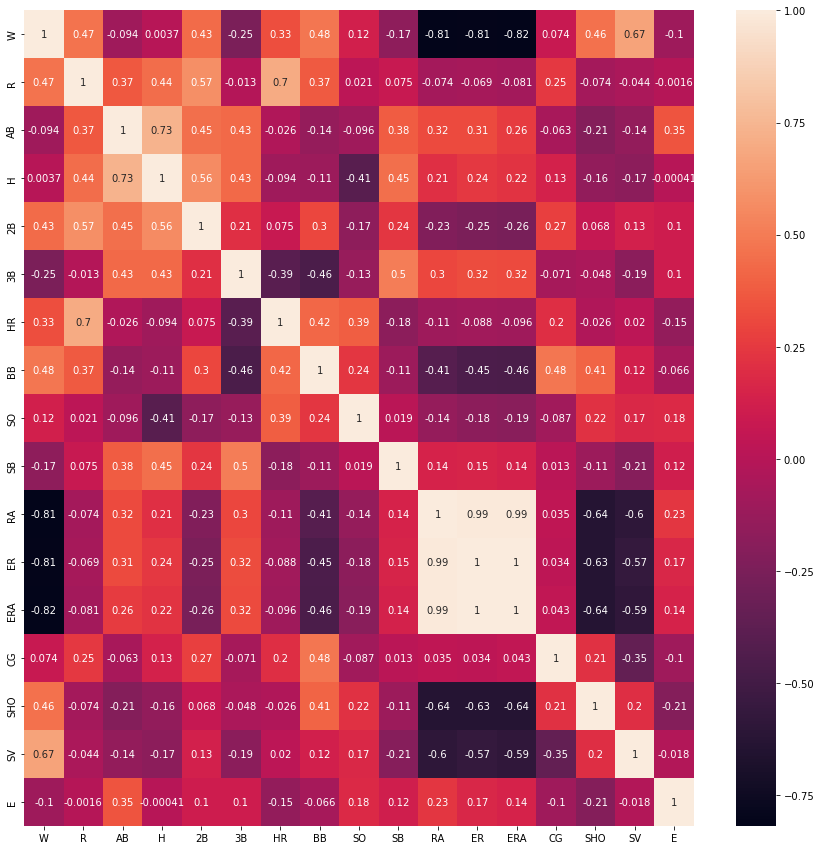

In [86]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,annot_kws={"size":10})
plt.show()

In [87]:
#CONSIDERING THE HEATMAP FOR CORRELATION AND THE SCORES USING "VIF" IT IS CONFIRMED THAT MULTICOLLINEARITY PROBLEM EXISTS IN THIS PROBLEM<BR>
#MOREEVER EARNED RUNS(ER) AND EARNED RUN (ERA) ARE DERIVED FROM THE RUNS(R) ONLY<BR>
#SINCE EARNED RUNS AVERAGE(ERA) HAVE THE HIGHEST CORRELATION WITH THE WIN(0.82) WE WILL KEEP IT<BR>
#RUNS AVERAGE(RA) AND EARNED RUNS(ER) WILL BE DROPPED AS JUST KEEPING (EARNED RUNS AVERAGE) WILL(ERA) AND RUNS(R) WILL  DO THE SAME THING AS KEEPING ALL THESE 4 PARAMETERS

In [88]:
df.drop(['ER','RA'],axis=1,inplace=True)

In [89]:
x_scaled=df.drop(['W'],axis=1)
y=df['W']

In [90]:
vif=pd.DataFrame()
scores=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
features=x_scaled.columns

In [91]:
vif['FEATURES']=features
vif['SCORES']=scores

In [92]:
vif

,FEATURES,SCORES
0,R,7.598474
1,AB,3.706712
2,H,5.625431
3,2B,3.335733
4,3B,3.066916
5,HR,6.710085
6,BB,2.979056
7,SO,2.233051
8,SB,1.929035
9,ERA,4.423055


AS WE CAN SEE NO SCORE IS EXCEEDING THE EXTREME CRITICAL SCORE 10  NOW IT CAN BE INFERRED THAT WE HAVE CONTROLLED THE MULTICOLLINEARITY PROBLEM TO A GOOD EXTENT<BR><br>
Though RUNS(R) and HomeRuns(HR) have a scores slightly greater than the critical score we cant afford to drop one of them as already the shape of the data is small and reducing it further will affect our predictions to a good extent so inspite the score s are bit high we will not Runs(R) OR HomeRuns(Hr)

IMPORTING NECESSARY  LIBRARIES

In [93]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Linear Regression
------------------

USING FOR LOOP TO ITERATE WITH DIFFERENT RANDOM_STATES AND SELECTING THE RANDOM STATE WITH HIGH TRAINING AND TESTING ACCURACY

In [94]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    lr_train_pred=lr.predict(x_train)
    lr_test_pred=lr.predict(x_test)
    lr_train_accuracy=r2_score(y_train,lr_train_pred)
    lr_test_accuracy=r2_score(y_test,lr_test_pred)
    if(round(lr_train_accuracy*100,1)==round(lr_test_accuracy*100,1)):
        print('\n\nAT RANDOM STATE--',i)
        print(f'\n\nTRAINING ACCURACY IS -{round((lr_train_accuracy)*100,2)}--AND TESTING ACCURACY IS {round((lr_test_accuracy)*100,2)}')
        



AT RANDOM STATE-- 603


TRAINING ACCURACY IS -92.85--AND TESTING ACCURACY IS 92.77


AT RANDOM STATE-- 746


TRAINING ACCURACY IS -93.53--AND TESTING ACCURACY IS 93.53


SELECTING RANDOM STATE AS 746

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=746)

CHECKING FOR CROSS VAL SCORES:

In [96]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cross_val=cross_val_score(lr,x_scaled,y,cv=i).mean()
    print(f"\n\nCROSS VAL IS AT CV = {i} is {round(cross_val*100,2)}")



CROSS VAL IS AT CV = 2 is -444.58


CROSS VAL IS AT CV = 3 is 29.79


CROSS VAL IS AT CV = 4 is 67.13


CROSS VAL IS AT CV = 5 is 44.59


CROSS VAL IS AT CV = 6 is 48.65


CROSS VAL IS AT CV = 7 is 46.35


CROSS VAL IS AT CV = 8 is 64.3


CROSS VAL IS AT CV = 9 is -777.96


taking cv=4 but the difference between cross val score and testing score is very high hinting that the model might be overfitting and we have to check this

In [97]:
#initialising random_state=746
#initialising cv=4
ran=746
c=4

In [98]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def score(mod,x_train,x_test,y_train,y_test,train):
    n=x_train.shape[0]
    p=14
    if (train==True):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_train)
        accuracy=r2_score(y_train,y_pred)
        mse=mean_squared_error(y_train,y_pred)
        mae=mean_absolute_error(y_train,y_pred)
        rsme=np.sqrt(mse)
        print(f"\n\nTraining SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\nmean sqaured error is --',mse)
        print('\nmean sqaured error is --',mse)
        print('\nroot mean sqaured error is --',rsme)
        print('\nmean aboslute error is --',mae)
        print('\ndifference between rmse and mae is ',rsme-mae)
    elif(train==False):
        mod.fit(x_train,y_train)
        y_pred=mod.predict(x_test)
        accuracy=r2_score(y_test,y_pred)
        cross_val=cross_val_score(mod,x_scaled,y,cv=4).mean()
        ad_r=1-(1-accuracy)*(n-1)/(n-p-1)
        mse=mean_squared_error(y_test,y_pred)
        mae=mean_absolute_error(y_test,y_pred)
        rsme=np.sqrt(mse)
        print(f"\n\nTesting SCORE FOR THE {mod} is {round(accuracy*100,2)}")
        print('\n\nCROSS VAL SCORE IS --',round(cross_val*100,2))
        print(f"\nadjusted r2_score for {mod} is {round(ad_r*100,2)}")
        print('\nmean sqaured error is --',mse)
        print('\nmean aboslute error is -',mae)
        print('\nroot mean sqaured error is --',rsme)
        print('\nmean aboslute error is --',mae)
        print('\ndifference between rmse and mae is ',rsme-mae)

In [99]:
score(lr,x_train,x_test,y_train,y_test,train=True)
score(lr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE LinearRegression() is 93.53

mean sqaured error is -- 0.05761665901900904

mean sqaured error is -- 0.05761665901900904

root mean sqaured error is -- 0.2400347037805347

mean aboslute error is -- 0.1996394074203797

difference between rmse and mae is  0.040395296360155014


Testing SCORE FOR THE LinearRegression() is 93.53


CROSS VAL SCORE IS -- 67.13

adjusted r2_score for LinearRegression() is 83.46

mean sqaured error is -- 0.09294850502086528

mean aboslute error is - 0.23258790861797438

root mean sqaured error is -- 0.3048745726046455

mean aboslute error is -- 0.23258790861797438

difference between rmse and mae is  0.07228666398667113


In [100]:
#SIGINIFACNT DIFFERENCE BETWEEN ADJUSTED R2 SCORE ,CROSS VAL SCORE AND TESTING SCORE

CHECKING FOR THE LINEAR REGRESSION MODEL OVERFITTING USING LASSO<br>

In [101]:
from sklearn.linear_model import Lasso,LassoCV

In [102]:
lass=LassoCV()

In [103]:
lass.fit(x_train,y_train)

LassoCV()

In [104]:
alpha=lass.alpha_

In [105]:
lasr=Lasso(alpha)

In [106]:
lasr.fit(x_train,y_train)

Lasso(alpha=0.048941929107560844)

In [107]:
score(lasr,x_train,x_test,y_train,y_test,train=True)
score(lasr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE Lasso(alpha=0.048941929107560844) is 90.0

mean sqaured error is -- 0.0890470858881345

mean sqaured error is -- 0.0890470858881345

root mean sqaured error is -- 0.2984075834963557

mean aboslute error is -- 0.26370725439163584

difference between rmse and mae is  0.034700329104719874


Testing SCORE FOR THE Lasso(alpha=0.048941929107560844) is 94.91


CROSS VAL SCORE IS -- 83.53

adjusted r2_score for Lasso(alpha=0.048941929107560844) is 87.0

mean sqaured error is -- 0.0730129916783384

mean aboslute error is - 0.18276956528988272

root mean sqaured error is -- 0.27020916283194096

mean aboslute error is -- 0.18276956528988272

difference between rmse and mae is  0.08743959754205824


HYPER PARAMETER TUNINING
-------------------

In [108]:
lasr.get_params().keys()

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
param={"alpha":np.arange(0.001,0.1,0.02),
      "normalize":[True,False],
      "max_iter":[500,590,700,810,900,1200,1150],
      "random_state":[500,746,121,349,200]
      }

In [111]:
gsc=GridSearchCV(lasr,param_grid=param)

In [112]:
gsc.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(alpha=0.048941929107560844),
             param_grid={'alpha': array([0.001, 0.021, 0.041, 0.061, 0.081]),
                         'max_iter': [500, 590, 700, 810, 900, 1200, 1150],
                         'normalize': [True, False],
                         'random_state': [500, 746, 121, 349, 200]})

In [113]:
gsc.best_params_

{'alpha': 0.041, 'max_iter': 500, 'normalize': False, 'random_state': 500}

In [114]:
lasr=gsc.best_estimator_

In [115]:
score(lasr,x_train,x_test,y_train,y_test,train=True)
score(lasr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE Lasso(alpha=0.041, max_iter=500, normalize=False, random_state=500) is 90.43

mean sqaured error is -- 0.08519339890108434

mean sqaured error is -- 0.08519339890108434

root mean sqaured error is -- 0.2918790826713767

mean aboslute error is -- 0.25690427409619304

difference between rmse and mae is  0.03497480857518365


Testing SCORE FOR THE Lasso(alpha=0.041, max_iter=500, normalize=False, random_state=500) is 95.17


CROSS VAL SCORE IS -- 83.79

adjusted r2_score for Lasso(alpha=0.041, max_iter=500, normalize=False, random_state=500) is 87.66

mean sqaured error is -- 0.06933399330861563

mean aboslute error is - 0.18190492119103296

root mean sqaured error is -- 0.2633134886568017

mean aboslute error is -- 0.18190492119103296

difference between rmse and mae is  0.08140856746576874


SOME MORE TUNING
--------------

In [116]:
lasr=Lasso()

In [117]:
param={"alpha":np.arange(0.01,0.02,0.001),
      "normalize":[True,False],
      "max_iter":[500,590,700,810,900,1200,1150,1200,1500],
      "random_state":[500,746,121,349,200,256,678]
      }

In [118]:
gsc=GridSearchCV(lasr,param_grid=param)

In [119]:
gsc.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': array([0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019]),
                         'max_iter': [500, 590, 700, 810, 900, 1200, 1150, 1200,
                                      1500],
                         'normalize': [True, False],
                         'random_state': [500, 746, 121, 349, 200, 256, 678]})

In [120]:
gsc.best_params_

{'alpha': 0.01, 'max_iter': 500, 'normalize': True, 'random_state': 500}

In [121]:
lasr=gsc.best_estimator_

In [122]:
score(lasr,x_train,x_test,y_train,y_test,train=True)
score(lasr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE Lasso(alpha=0.01, max_iter=500, normalize=True, random_state=500) is 89.98

mean sqaured error is -- 0.08924825089403997

mean sqaured error is -- 0.08924825089403997

root mean sqaured error is -- 0.298744457511834

mean aboslute error is -- 0.26368059333405675

difference between rmse and mae is  0.03506386417777724


Testing SCORE FOR THE Lasso(alpha=0.01, max_iter=500, normalize=True, random_state=500) is 95.01


CROSS VAL SCORE IS -- 83.84

adjusted r2_score for Lasso(alpha=0.01, max_iter=500, normalize=True, random_state=500) is 87.25

mean sqaured error is -- 0.07165738570433224

mean aboslute error is - 0.18580462339115256

root mean sqaured error is -- 0.2676889719512783

mean aboslute error is -- 0.18580462339115256

difference between rmse and mae is  0.08188434856012572


SINCE CROSS VAL SCORE ,ADJUSTED R2 SCORE,AND CROSS VAL SCORE ARE NOT HAVING MUCH DIFFERENCE WE WILL CONTINUW WITH THESE PARAMETERS AS THE FINAL

MODEL 3)-RANDOM FOREST REGRESSOR
------------------

In [123]:
from sklearn.ensemble import RandomForestRegressor

In [124]:
rfr=RandomForestRegressor()

In [125]:
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [126]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor() is 92.17

mean sqaured error is -- 0.0697551292419931

mean sqaured error is -- 0.0697551292419931

root mean sqaured error is -- 0.2641119634586686

mean aboslute error is -- 0.20940120216757818

difference between rmse and mae is  0.054710761291090426


Testing SCORE FOR THE RandomForestRegressor() is 64.15


CROSS VAL SCORE IS -- 40.04

adjusted r2_score for RandomForestRegressor() is 8.39

mean sqaured error is -- 0.5146828827606622

mean aboslute error is - 0.5758317837103709

root mean sqaured error is -- 0.7174140246473177

mean aboslute error is -- 0.5758317837103709

difference between rmse and mae is  0.14158224093694682


Low cross val scores we have to tune the parameters:

Hyperparameter tuning
-----------------------

In [127]:
par={"n_estimators":[60,72,82,100,150,200],
     "criterion":["squared_error", "absolute_error", "poisson"],
     "max_depth":[25,28,30,35,50],
     "min_samples_split":[2,3,5,6]}

In [128]:
rgs=GridSearchCV(rfr,param_grid=par)

In [129]:
rgs.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [25, 28, 30, 35, 50],
                         'min_samples_split': [2, 3, 5, 6],
                         'n_estimators': [60, 72, 82, 100, 150, 200]})

In [130]:
rgs.best_params_

{'criterion': 'squared_error',
 'max_depth': 25,
 'min_samples_split': 3,
 'n_estimators': 72}

In [131]:
rfr=rgs.best_estimator_

In [132]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor(max_depth=25, min_samples_split=3, n_estimators=72) is 91.31

mean sqaured error is -- 0.0773479465396182

mean sqaured error is -- 0.0773479465396182

root mean sqaured error is -- 0.27811498798090367

mean aboslute error is -- 0.22780167229254378

difference between rmse and mae is  0.050313315688359894


Testing SCORE FOR THE RandomForestRegressor(max_depth=25, min_samples_split=3, n_estimators=72) is 69.08


CROSS VAL SCORE IS -- 39.12

adjusted r2_score for RandomForestRegressor(max_depth=25, min_samples_split=3, n_estimators=72) is 20.99

mean sqaured error is -- 0.44387491903806703

mean aboslute error is - 0.513675389195012

root mean sqaured error is -- 0.6662393856851057

mean aboslute error is -- 0.513675389195012

difference between rmse and mae is  0.15256399649009367


AGAIN TUNING THE PARAMETERS
---------------------

In [133]:
rfr.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [135]:
par={"n_estimators":[99,110,210,180],
     "criterion":["squared_error", "absolute_error", "poisson"],
     "max_depth":np.arange(10,15),
     "min_samples_split":np.arange(8,11),
    "random_state":[300,400,559,746]}

In [136]:
rfgs=GridSearchCV(rfr,param_grid=par)

In [137]:
rfgs.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(max_depth=25, min_samples_split=3,
                                             n_estimators=72),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': array([10, 11, 12, 13, 14]),
                         'min_samples_split': array([ 8,  9, 10]),
                         'n_estimators': [99, 110, 210, 180],
                         'random_state': [300, 400, 559, 746]})

In [138]:
rfgs.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'min_samples_split': 8,
 'n_estimators': 210,
 'random_state': 746}

In [139]:
rfr=rfgs.best_estimator_

In [140]:
score(rfr,x_train,x_test,y_train,y_test,train=True)
score(rfr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE RandomForestRegressor(max_depth=10, min_samples_split=8, n_estimators=210,
                      random_state=746) is 78.38

mean sqaured error is -- 0.19254896475209926

mean sqaured error is -- 0.19254896475209926

root mean sqaured error is -- 0.43880401633542426

mean aboslute error is -- 0.35197118211390194

difference between rmse and mae is  0.08683283422152233


Testing SCORE FOR THE RandomForestRegressor(max_depth=10, min_samples_split=8, n_estimators=210,
                      random_state=746) is 65.36


CROSS VAL SCORE IS -- 33.94

adjusted r2_score for RandomForestRegressor(max_depth=10, min_samples_split=8, n_estimators=210,
                      random_state=746) is 11.48

mean sqaured error is -- 0.49735031157063075

mean aboslute error is - 0.5858983221809541

root mean sqaured error is -- 0.7052306796861796

mean aboslute error is -- 0.5858983221809541

difference between rmse and mae is  0.11933235750522553


MODEL 4) ADA BOOST REGRESSOR
-------------------

In [141]:
from sklearn.ensemble import AdaBoostRegressor

In [142]:
adr=AdaBoostRegressor()

In [143]:
adr.fit(x_train,y_train)

AdaBoostRegressor()

In [144]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor() is 97.71

mean sqaured error is -- 0.020397413222765604

mean sqaured error is -- 0.020397413222765604

root mean sqaured error is -- 0.14281951275216423

mean aboslute error is -- 0.09496281542470895

difference between rmse and mae is  0.047856697327455275


Testing SCORE FOR THE AdaBoostRegressor() is 68.9


CROSS VAL SCORE IS -- 30.74

adjusted r2_score for AdaBoostRegressor() is 20.53

mean sqaured error is -- 0.44651033064274465

mean aboslute error is - 0.5384193752693894

root mean sqaured error is -- 0.6682142849735739

mean aboslute error is -- 0.5384193752693894

difference between rmse and mae is  0.1297949097041845


HYPERPARAMETER TUNING----------------
----------------------

In [145]:
adr.get_params().keys()

dict_keys(['base_estimator', 'learning_rate', 'loss', 'n_estimators', 'random_state'])

In [198]:
adr=AdaBoostRegressor()

In [199]:
para={
     'n_estimators':np.arange(50,60),
     'learning_rate':[0.001,0.025,0.03,0.1,0.25,0.0025],
     'random_state':[232,345,678,746]}


In [200]:
ags=GridSearchCV(adr,param_grid=para)

In [201]:
ags.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.025, 0.03, 0.1, 0.25,
                                           0.0025],
                         'n_estimators': array([50, 51, 52, 53, 54, 55, 56, 57, 58, 59]),
                         'random_state': [232, 345, 678, 746]})

In [202]:
ags.best_params_

{'learning_rate': 0.025, 'n_estimators': 50, 'random_state': 232}

In [203]:
adr=ags.best_estimator_

In [204]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor(learning_rate=0.025, random_state=232) is 97.94

mean sqaured error is -- 0.018342787969337117

mean sqaured error is -- 0.018342787969337117

root mean sqaured error is -- 0.13543554913440237

mean aboslute error is -- 0.09462531949239418

difference between rmse and mae is  0.040810229642008186


Testing SCORE FOR THE AdaBoostRegressor(learning_rate=0.025, random_state=232) is 77.71


CROSS VAL SCORE IS -- 36.63

adjusted r2_score for AdaBoostRegressor(learning_rate=0.025, random_state=232) is 43.04

mean sqaured error is -- 0.3200396902059485

mean aboslute error is - 0.42262035299323153

root mean sqaured error is -- 0.5657205053787149

mean aboslute error is -- 0.42262035299323153

difference between rmse and mae is  0.14310015238548335


Again tuning the parameters
----------------

In [205]:
adr=AdaBoostRegressor()

In [206]:
para={
     'n_estimators':[35,40,45,52,58,20],
     'learning_rate':[0.1,0.025,0.03,0.45],
     'random_state':[232,345,678,746,446,123]}


In [207]:
ags=GridSearchCV(adr,param_grid=para)

In [208]:
ags.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.025, 0.03, 0.45],
                         'n_estimators': [35, 40, 45, 52, 58, 20],
                         'random_state': [232, 345, 678, 746, 446, 123]})

In [209]:
ags.best_params_

{'learning_rate': 0.45, 'n_estimators': 35, 'random_state': 446}

In [210]:
adr=ags.best_estimator_

In [211]:
score(adr,x_train,x_test,y_train,y_test,train=True)
score(adr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE AdaBoostRegressor(learning_rate=0.45, n_estimators=35, random_state=446) is 98.24

mean sqaured error is -- 0.015695117125320703

mean sqaured error is -- 0.015695117125320703

root mean sqaured error is -- 0.1252801545549841

mean aboslute error is -- 0.08443042054735668

difference between rmse and mae is  0.04084973400762741


Testing SCORE FOR THE AdaBoostRegressor(learning_rate=0.45, n_estimators=35, random_state=446) is 70.84


CROSS VAL SCORE IS -- 25.26

adjusted r2_score for AdaBoostRegressor(learning_rate=0.45, n_estimators=35, random_state=446) is 25.49

mean sqaured error is -- 0.41863580604233047

mean aboslute error is - 0.5811163544071637

root mean sqaured error is -- 0.6470207153115969

mean aboslute error is -- 0.5811163544071637

difference between rmse and mae is  0.06590436090443319


MODEL 5)  SVR
-----------------------

In [159]:
from sklearn.svm import SVR

In [160]:
svr=SVR()

In [161]:
svr.fit(x_train,y_train)

SVR()

In [162]:
score(svr,x_train,x_test,y_train,y_test,train=True)
score(svr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVR() is 93.75

mean sqaured error is -- 0.055639801863742205

mean sqaured error is -- 0.055639801863742205

root mean sqaured error is -- 0.23588090610251225

mean aboslute error is -- 0.17897027601577534

difference between rmse and mae is  0.05691063008673691


Testing SCORE FOR THE SVR() is 43.99


CROSS VAL SCORE IS -- 27.52

adjusted r2_score for SVR() is -43.13

mean sqaured error is -- 0.8041512170271959

mean aboslute error is - 0.7899085501460582

root mean sqaured error is -- 0.8967447892389429

mean aboslute error is -- 0.7899085501460582

difference between rmse and mae is  0.10683623909288464


HYPERPARAMETER TUNING
-----------------

In [163]:
parm={"epsilon":[0.1,0.2,0.3],
      "shrinking":[True,False],
      "gamma":['scale', 'auto']}

In [164]:
sgs=GridSearchCV(svr,param_grid=parm)

In [165]:
sgs.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'epsilon': [0.1, 0.2, 0.3], 'gamma': ['scale', 'auto'],
                         'shrinking': [True, False]})

In [166]:
sgs.best_params_

{'epsilon': 0.3, 'gamma': 'auto', 'shrinking': True}

In [167]:
svr=sgs.best_estimator_

In [168]:
svr.fit(x_train,y_train)

SVR(epsilon=0.3, gamma='auto')

In [169]:
score(svr,x_train,x_test,y_train,y_test,train=True)
score(svr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE SVR(epsilon=0.3, gamma='auto') is 89.85

mean sqaured error is -- 0.0903727009594187

mean sqaured error is -- 0.0903727009594187

root mean sqaured error is -- 0.30062052651044757

mean aboslute error is -- 0.27279112809165507

difference between rmse and mae is  0.027829398418792506


Testing SCORE FOR THE SVR(epsilon=0.3, gamma='auto') is 46.25


CROSS VAL SCORE IS -- 29.73

adjusted r2_score for SVR(epsilon=0.3, gamma='auto') is -37.37

mean sqaured error is -- 0.7717627929800067

mean aboslute error is - 0.7621197223841695

root mean sqaured error is -- 0.8785003090380826

mean aboslute error is -- 0.7621197223841695

difference between rmse and mae is  0.11638058665391315


MODEL 6) KNN 
---------------------------------

In [170]:
from sklearn.neighbors import KNeighborsRegressor

In [171]:
knr=KNeighborsRegressor()

In [172]:
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [173]:
score(knr,x_train,x_test,y_train,y_test,train=True)
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor() is 62.79

mean sqaured error is -- 0.33133776237205387

mean sqaured error is -- 0.33133776237205387

root mean sqaured error is -- 0.5756194596884767

mean aboslute error is -- 0.4583275907352489

difference between rmse and mae is  0.1172918689532278


Testing SCORE FOR THE KNeighborsRegressor() is 53.51


CROSS VAL SCORE IS -- 35.38

adjusted r2_score for KNeighborsRegressor() is -18.8

mean sqaured error is -- 0.6674692328680137

mean aboslute error is - 0.6781446490584678

root mean sqaured error is -- 0.8169879025224387

mean aboslute error is -- 0.6781446490584678

difference between rmse and mae is  0.13884325346397086


HYPERPARAMETER TUNING THE PARAMETEr:
-----------

In [174]:
knr.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [175]:
pl={"n_neighbors":np.arange(3,6),
   "weights":['uniform', 'distance'],
   "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':np.arange(25,35)}

In [176]:
kgs=GridSearchCV(knr,param_grid=pl)

In [177]:
kgs.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
                         'n_neighbors': array([3, 4, 5]),
                         'weights': ['uniform', 'distance']})

In [178]:
kgs.best_params_

{'algorithm': 'brute',
 'leaf_size': 25,
 'n_neighbors': 5,
 'weights': 'distance'}

In [180]:
knr=kgs.best_estimator_

In [181]:
knr.fit(x_train,y_train)

KNeighborsRegressor(algorithm='brute', leaf_size=25, weights='distance')

In [182]:
score(knr,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor(algorithm='brute', leaf_size=25, weights='distance') is 100.0

mean sqaured error is -- 4.757494544154406e-16

mean sqaured error is -- 4.757494544154406e-16

root mean sqaured error is -- 2.181168160448526e-08

mean aboslute error is -- 9.375926280733951e-09

difference between rmse and mae is  1.2435755323751308e-08


-----------------------




Testing SCORE FOR THE KNeighborsRegressor(algorithm='brute', leaf_size=25, weights='distance') is 54.59


CROSS VAL SCORE IS -- 36.45

adjusted r2_score for KNeighborsRegressor(algorithm='brute', leaf_size=25, weights='distance') is -16.05

mean sqaured error is -- 0.6520279291586005

mean aboslute error is - 0.6784773015995603

root mean sqaured error is -- 0.8074824636848781

mean aboslute error is -- 0.6784773015995603

difference between rmse and mae is  0.12900516208531776


AGAIN TUNING THE PARAMETERS------------------------
---------------------

In [190]:
knr=KNeighborsRegressor()

In [191]:
pu={"n_neighbors":np.arange(2,5),
   "weights":['uniform', 'distance'],
   "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':np.arange(8,15)}

In [192]:
kgsv=GridSearchCV(knr,param_grid=pu)

In [193]:
kgsv.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': array([ 8,  9, 10, 11, 12, 13, 14]),
                         'n_neighbors': array([2, 3, 4]),
                         'weights': ['uniform', 'distance']})

In [194]:
kgsv.best_params_

{'algorithm': 'auto', 'leaf_size': 8, 'n_neighbors': 4, 'weights': 'uniform'}

In [195]:
knr=kgsv.best_estimator_

In [196]:
knr.fit(x_train,y_train)

KNeighborsRegressor(leaf_size=8, n_neighbors=4)

In [197]:
score(knr,x_train,x_test,y_train,y_test,train=True)
print('\n\n-----------------------\n\n')
score(knr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE KNeighborsRegressor(leaf_size=8, n_neighbors=4) is 64.29

mean sqaured error is -- 0.317973689803911

mean sqaured error is -- 0.317973689803911

root mean sqaured error is -- 0.5638915585499671

mean aboslute error is -- 0.4595839999817981

difference between rmse and mae is  0.10430755856816898


-----------------------




Testing SCORE FOR THE KNeighborsRegressor(leaf_size=8, n_neighbors=4) is 69.63


CROSS VAL SCORE IS -- 32.61

adjusted r2_score for KNeighborsRegressor(leaf_size=8, n_neighbors=4) is 22.38

mean sqaured error is -- 0.43606817878067256

mean aboslute error is - 0.5639528002812039

root mean sqaured error is -- 0.6603545856437074

mean aboslute error is -- 0.5639528002812039

difference between rmse and mae is  0.09640178536250354


MODEL 2)-DECISION TREE
----------------------

In [212]:
from sklearn.tree import DecisionTreeRegressor

In [213]:
dt=DecisionTreeRegressor()

In [214]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor() is 100.0

mean sqaured error is -- 0.0

mean sqaured error is -- 0.0

root mean sqaured error is -- 0.0

mean aboslute error is -- 0.0

difference between rmse and mae is  0.0


Testing SCORE FOR THE DecisionTreeRegressor() is 31.41


CROSS VAL SCORE IS -- -44.65

adjusted r2_score for DecisionTreeRegressor() is -75.27

mean sqaured error is -- 0.9847424916873432

mean aboslute error is - 0.7238258745349158

root mean sqaured error is -- 0.9923419227702431

mean aboslute error is -- 0.7238258745349158

difference between rmse and mae is  0.2685160482353274


#### HYPERPARAMETER TUNING THE PARAMETERS:

In [215]:
dt=DecisionTreeRegressor()

In [216]:
ppo={'criterion':["squared_error", "friedman_mse", "absolute_error"],
      'splitter':["best", "random"],
      'min_samples_split':np.arange(2,5),
    'min_samples_leaf':np.arange(3,6),
    'random_state':[404,350,234,210,198],
    'max_depth':np.arange(28,32)}

In [218]:
lgt=GridSearchCV(dt,param_grid=ppo)

In [219]:
lgt.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': array([28, 29, 30, 31]),
                         'min_samples_leaf': array([3, 4, 5]),
                         'min_samples_split': array([2, 3, 4]),
                         'random_state': [404, 350, 234, 210, 198],
                         'splitter': ['best', 'random']})

In [220]:
lgt.best_params_

{'criterion': 'squared_error',
 'max_depth': 28,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'random_state': 198,
 'splitter': 'random'}

In [221]:
dt=lgt.best_estimator_

In [222]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=28, min_samples_leaf=5, random_state=198,
                      splitter='random')

In [223]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor(max_depth=28, min_samples_leaf=5, random_state=198,
                      splitter='random') is 63.61

mean sqaured error is -- 0.32403043266071135

mean sqaured error is -- 0.32403043266071135

root mean sqaured error is -- 0.5692367105701382

mean aboslute error is -- 0.4956906385583939

difference between rmse and mae is  0.07354607201174435


Testing SCORE FOR THE DecisionTreeRegressor(max_depth=28, min_samples_leaf=5, random_state=198,
                      splitter='random') is 57.06


CROSS VAL SCORE IS -- 15.48

adjusted r2_score for DecisionTreeRegressor(max_depth=28, min_samples_leaf=5, random_state=198,
                      splitter='random') is -9.73

mean sqaured error is -- 0.6164679295908209

mean aboslute error is - 0.6051686887865079

root mean sqaured error is -- 0.7851547169767376

mean aboslute error is -- 0.6051686887865079

difference between rmse and mae is  0.17998602819022969


Hyperparameter tuning
-------------------

In [ ]:
dt=DecisionTreeRegressor()

In [226]:
ppo={'criterion':["squared_error", "friedman_mse", "absolute_error"],
      'splitter':["best", "random"],
      'min_samples_split':np.arange(2,5),
    'min_samples_leaf':np.arange(9,13),
    'random_state':[404,350,234,210,198],
    'max_depth':np.arange(18,22)}

In [227]:
lgt=GridSearchCV(dt,param_grid=ppo)

In [228]:
lgt.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(max_depth=28, min_samples_leaf=5,
                                             random_state=198,
                                             splitter='random'),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': array([18, 19, 20, 21]),
                         'min_samples_leaf': array([ 9, 10, 11, 12]),
                         'min_samples_split': array([2, 3, 4]),
                         'random_state': [404, 350, 234, 210, 198],
                         'splitter': ['best', 'random']})

In [229]:
lgt.best_params_

{'criterion': 'squared_error',
 'max_depth': 18,
 'min_samples_leaf': 9,
 'min_samples_split': 2,
 'random_state': 404,
 'splitter': 'best'}

In [230]:
dt=lgt.best_estimator_

In [231]:
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=18, min_samples_leaf=9, random_state=404)

In [232]:
score(dt,x_train,x_test,y_train,y_test,train=True)
score(dt,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE DecisionTreeRegressor(max_depth=18, min_samples_leaf=9, random_state=404) is 52.81

mean sqaured error is -- 0.42024217185257456

mean sqaured error is -- 0.42024217185257456

root mean sqaured error is -- 0.648260882556224

mean aboslute error is -- 0.5578110888285198

difference between rmse and mae is  0.09044979372770423


Testing SCORE FOR THE DecisionTreeRegressor(max_depth=18, min_samples_leaf=9, random_state=404) is 52.08


CROSS VAL SCORE IS -- 8.76

adjusted r2_score for DecisionTreeRegressor(max_depth=18, min_samples_leaf=9, random_state=404) is -22.46

mean sqaured error is -- 0.6880367631280458

mean aboslute error is - 0.735093093554476

root mean sqaured error is -- 0.8294798147803513

mean aboslute error is -- 0.735093093554476

difference between rmse and mae is  0.09438672122587521


CONCLUSIONS:
---------------------    

SINCE FOR THE LASSO MODEL GOOD ACCURACIES FOR BOTH TESTING AND TRAINING CAN BE FOUND AS WELL AS DIFFERENCE BETWEEN CROSS VAL SCORES AND ADJUSTED R2 SCORE  S ALSO LESS LESS COMPARATIVELY TO OTHERS<BR><BR>
root mean sqaured error is -- 0.2676889719512783 WHICH IS ALSO LOW AND CAN BE CONSIDERED GOOD IN MODEL BUILDING<BR><BR>
difference between rmse and mae is  0.08188434856012572

In [233]:
score(lasr,x_train,x_test,y_train,y_test,train=True)
score(lasr,x_train,x_test,y_train,y_test,train=False)



Training SCORE FOR THE Lasso(alpha=0.01, max_iter=500, normalize=True, random_state=500) is 89.98

mean sqaured error is -- 0.08924825089403997

mean sqaured error is -- 0.08924825089403997

root mean sqaured error is -- 0.298744457511834

mean aboslute error is -- 0.26368059333405675

difference between rmse and mae is  0.03506386417777724


Testing SCORE FOR THE Lasso(alpha=0.01, max_iter=500, normalize=True, random_state=500) is 95.01


CROSS VAL SCORE IS -- 83.84

adjusted r2_score for Lasso(alpha=0.01, max_iter=500, normalize=True, random_state=500) is 87.25

mean sqaured error is -- 0.07165738570433224

mean aboslute error is - 0.18580462339115256

root mean sqaured error is -- 0.2676889719512783

mean aboslute error is -- 0.18580462339115256

difference between rmse and mae is  0.08188434856012572


SAVING THE MODEL
------------------

In [234]:
import pickle

In [235]:
with open("lass_reg",'wb') as files:
    pickle.dump(lasr,files)